# Zomato Restaurant

## Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

### Data Storage:
    
This problem statement contains two datasets- Zomato.csv and country_code.csv.

Country_code.csv contains two variables:
    
• Country code

• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
    
• Restaurant Id: Unique id of every restaurant across various cities of the world
    
• Restaurant Name: Name of the restaurant
    
• Country Code: Country in which restaurant is located
    
• City: City in which restaurant is located
    
• Address: Address of the restaurant
    
• Locality: Location in the city
    
• Locality Verbose: Detailed description of the locality
    
• Longitude: Longitude coordinate of the restaurant&#39;s location
    
• Latitude: Latitude coordinate of the restaurant&#39;s location
    
• Cuisines: Cuisines offered by the restaurant
    
• Average Cost for two: Cost for two people in different currencies ��
    
• Currency: Currency of the country
    
• Has Table booking: yes/no
    
• Has Online delivery: yes/ no
    
• Is delivering: yes/ no
    
• Switch to order menu: yes/no
    
• Price range: range of price of food
    
• Aggregate Rating: Average rating out of 5
    
• Rating color: depending upon the average rating color
    
• Rating text: text on the basis of rating of rating
    
• Votes: Number of ratings casted by people
    
Problem statement : In this dataset predict 2 things
    
1) Average Cost for two

2) Price range

In [671]:
# Importing required libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
import folium

import warnings
warnings.filterwarnings('ignore')

In [672]:
# Importing the dataset

z1 = pd.read_csv('zomato_restaurant.csv',encoding='utf-8',skipinitialspace=True)
z2 = pd.read_csv('Country-Code.csv',encoding='utf-8',skipinitialspace=True)

In [673]:
# Merging the dataset

zomato = pd.merge(z1,z2)
zomato.head(3)

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines  
2   Very Good    270  Phillipines

# Exploratory Data Analysis (EDA)

## Data PreProcessing

In [674]:
# Checking the sample dataset

pd.set_option('display.max_columns',None)

zomato.sample(5)

Restaurant ID                         Restaurant Name  Country Code  \
6200         300321                           Sahib e Aalam             1   
639         3400391                          Chapter 1 Cafe             1   
1010       18353030                                  Oh My!             1   
651        18438944  Blue -  Rooftop Cafe Restaurant Bistro             1   
9120        4000004                                     KFC             1   

           City                                            Address  \
6200  New Delhi  34, Sunder Plaza Market, Outer Ring Road, Pasc...   
639        Agra  1374 K/1375 K, 2nd floor, Dinesh Nagar, Fatehb...   
1010  Faridabad  Shop 45, Ground floor, SLF MALL, IP Colony, Se...   
651   Ahmedabad  10th Floor, Balaji Heights Buliding, Behind Ta...   
9120      Patna  Ground floor, Regent Theatre, Opposite East Ga...   

           Locality          Locality Verbose  Longitude   Latitude  \
6200  Paschim Vihar  Paschim Vihar, New Delhi  77.091677  28.664499   
639         Tajganj             Tajganj, Agra   0.000000   0.000000   
1010      Sector 30      Sector 30, Faridabad   0.000000   0.000000   
651        C G Road       C G Road, Ahmedabad  72.557037  23.029062   
9120       Golambar           Golambar, Patna  85.146492  25.617200   

                                               Cuisines  Average Cost for two  \
6200                              North Indian, Mughlai                   450   
639   Cafe, Italian, Mexican, North Indian, Continental                     0   
1010                                 Chinese, Fast Food                   300   
651   North Indian, Cafe, Italian, Mexican, Continental                  1000   
9120                                          Fast Food                   500   

                Currency Has Table booking Has Online delivery  \
6200  Indian Rupees(Rs.)                No                  No   
639   Indian Rupees(Rs.)                No                  No   
1010  Indian Rupees(Rs.)                No                  No   
651   Indian Rupees(Rs.)                No                 Yes   
9120  Indian Rupees(Rs.)                No                  No   

     Is delivering now Switch to order menu  Price range  Aggregate rating  \
6200                No                   No            1               3.2   
639                 No                   No            1               3.9   
1010                No                   No            1               0.0   
651                 No                   No            3               3.8   
9120                No                   No            2               3.3   

     Rating color Rating text  Votes Country  
6200       Orange     Average     49   India  
639        Yellow        Good     98   India  
1010        White   Not rated      2   India  
651        Yellow        Good     63   India  
9120       Orange     Average     49   India

In [675]:
# Checking the dimension of z1 

z1.shape

(9551, 21)

In [676]:
# Checking the dimension of z2

z2.shape

(15, 2)

In [677]:
# Checking the features present in z1

z2.columns

Index(['Country Code', 'Country'], dtype='object')

In [678]:
# Checking the dimension of the zomato dataset(merged z1 and z2)

zomato.shape

(9551, 22)

In [679]:
# Checking the features present in the dataset

zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [680]:
# Checking for any duplicate rows present in the dataset

dup = zomato[zomato.duplicated()]
dup.shape

(0, 22)

In [681]:
# Checking the information about the dataset

zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [682]:
# Checking for null values

zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [683]:
# Checking the unique values present in the dataset

zomato.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [684]:
# Checking the values present in the dataset

pd.set_option('display.max_rows',None)
for i in zomato.columns:
    print(zomato[i].value_counts())
    print('****************************')

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
18382047    1
18441566    1
18441669    1
18396358    1
6248        1
308832      1
18421030    1
18378016    1
310889      1
308837      1
18441685    1
6249        1
18222554    1
18380143    1
18372294    1
8600        1
18376484    1
468         1
8276        1
6120        1
18252395    1
18180073    1
18441678    1
18400762    1
306492      1
8488        1
310536      1
308360      1
18017248    1
312855      1
18463971    1
312860      1
18378023    1
18107855    1
18396955    1
216         1
303051      1
6905        1
307551      1
306267      1
306170      1
3972        1
2951        1
308242      1
18153553    1
311025      1
309578      1
476         1
310359      1
1308        1
18369772    1
1120        1
1998        1
18369301    1
310896      1
5446        1
5448        1
18408062    1
18415386    1
18397621    1
309383      1
8272        1
310801      1
495         1
18241532    1
18445783    1
183521

In [685]:
# Dropping features Restaurant ID, Locality, Switch to order menu, Rating color, Address, Country Code

zomato.drop(['Restaurant ID','Locality','Switch to order menu','Rating color','Address','Country Code'],axis=1,inplace=True)

In [686]:
# Dropping null values from the feature Cuisines

zomato = zomato.dropna()

In [687]:
# Checking the dimension of the dataset

zomato.shape

(9542, 16)

In [688]:
# Splitting the dataset into Categorical and Numerical

zomato_cat=[]

for i in zomato.columns:
    if zomato[i].dtypes == 'object':
        zomato_cat.append(i)
        
zomato_num=[]

for i in zomato.columns:
    if zomato[i].dtypes != 'object':
        zomato_num.append(i)
        
print('Categorical_Columns',zomato_cat)
print('Numerical_Columns',zomato_num)

Categorical_Columns ['Restaurant Name', 'City', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating text', 'Country']
Numerical_Columns ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


### Observations

Imported required libraries and dataset

Merged both the files Zomato and Country Code

Dataset contains 9551 rows and 22 columns

Data types present in the dataset are float64 – 3 , int64 – 5 and object - 14

Validated the dataset and no duplicate rows found 

Validated each feature to check if there are any unknown values and none found

9 Null values are present in the feature Cuisines which is small, hence dropped them from the dataset

Dropped the features 'Restaurant ID','Locality','Switch to order menu','Rating color','Address','Country Code' from the dataset for below reasons

Restaurant ID – Unique ID which represents the restaurant, it will not be much relevant for Model prediction

Locality – Almost same with the feature Locality Verbose, hence dropped the column

Switch to order menu – Contains only one unique value ‘ No’, it will not be much relevant for
model prediction

Rating color – Already we have a column name Rating Text based on which the rating color was assigned, its better to drop as it is not much relevant

Address – We do have City, locality Verbose, Restaurant name with latitude and longitude information,  hence address will not be much relevant for Model prediction

Country Code – Dropped the column as it is the code assigned to Country and we do have Country name, moreover Country code skewness reduced to NaN after applying transformation method and it is affecting in removing outliers as well, hence dropped the column before getting into feature Engineering

Dataset was split into Categorical and Numerical features

After removing above features dataset contains 9542 rows and 16 columns

Average Cost for two – Regression algorithm will be used to predict the Average Cost for two as the variable present in the feature is continuous 

Price range – Classification algorithm will be used to predict the Price range as the variable is discrete and applying classification algorithms would be a better choice 


# Data Visualization

## Univariate Analysis

<AxesSubplot:>

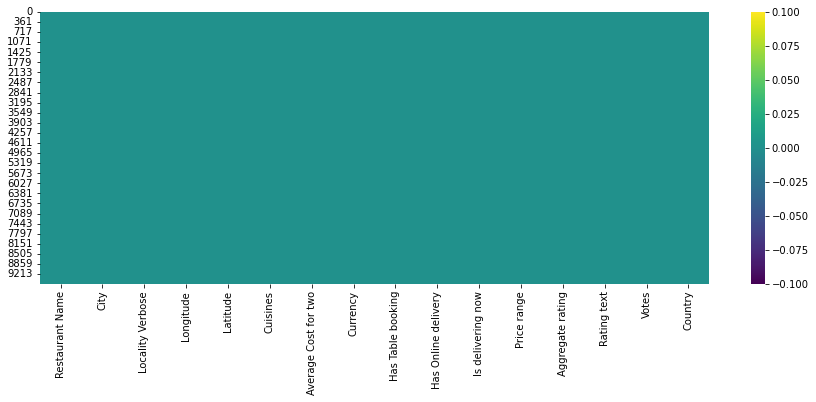

In [689]:
# Visualizing the dataset in heatmap

plt.figure(figsize=(15,5))
sns.heatmap(zomato.isnull(),cmap='viridis')

### Observations

Above heatmap shows there are no null values present in the dataset

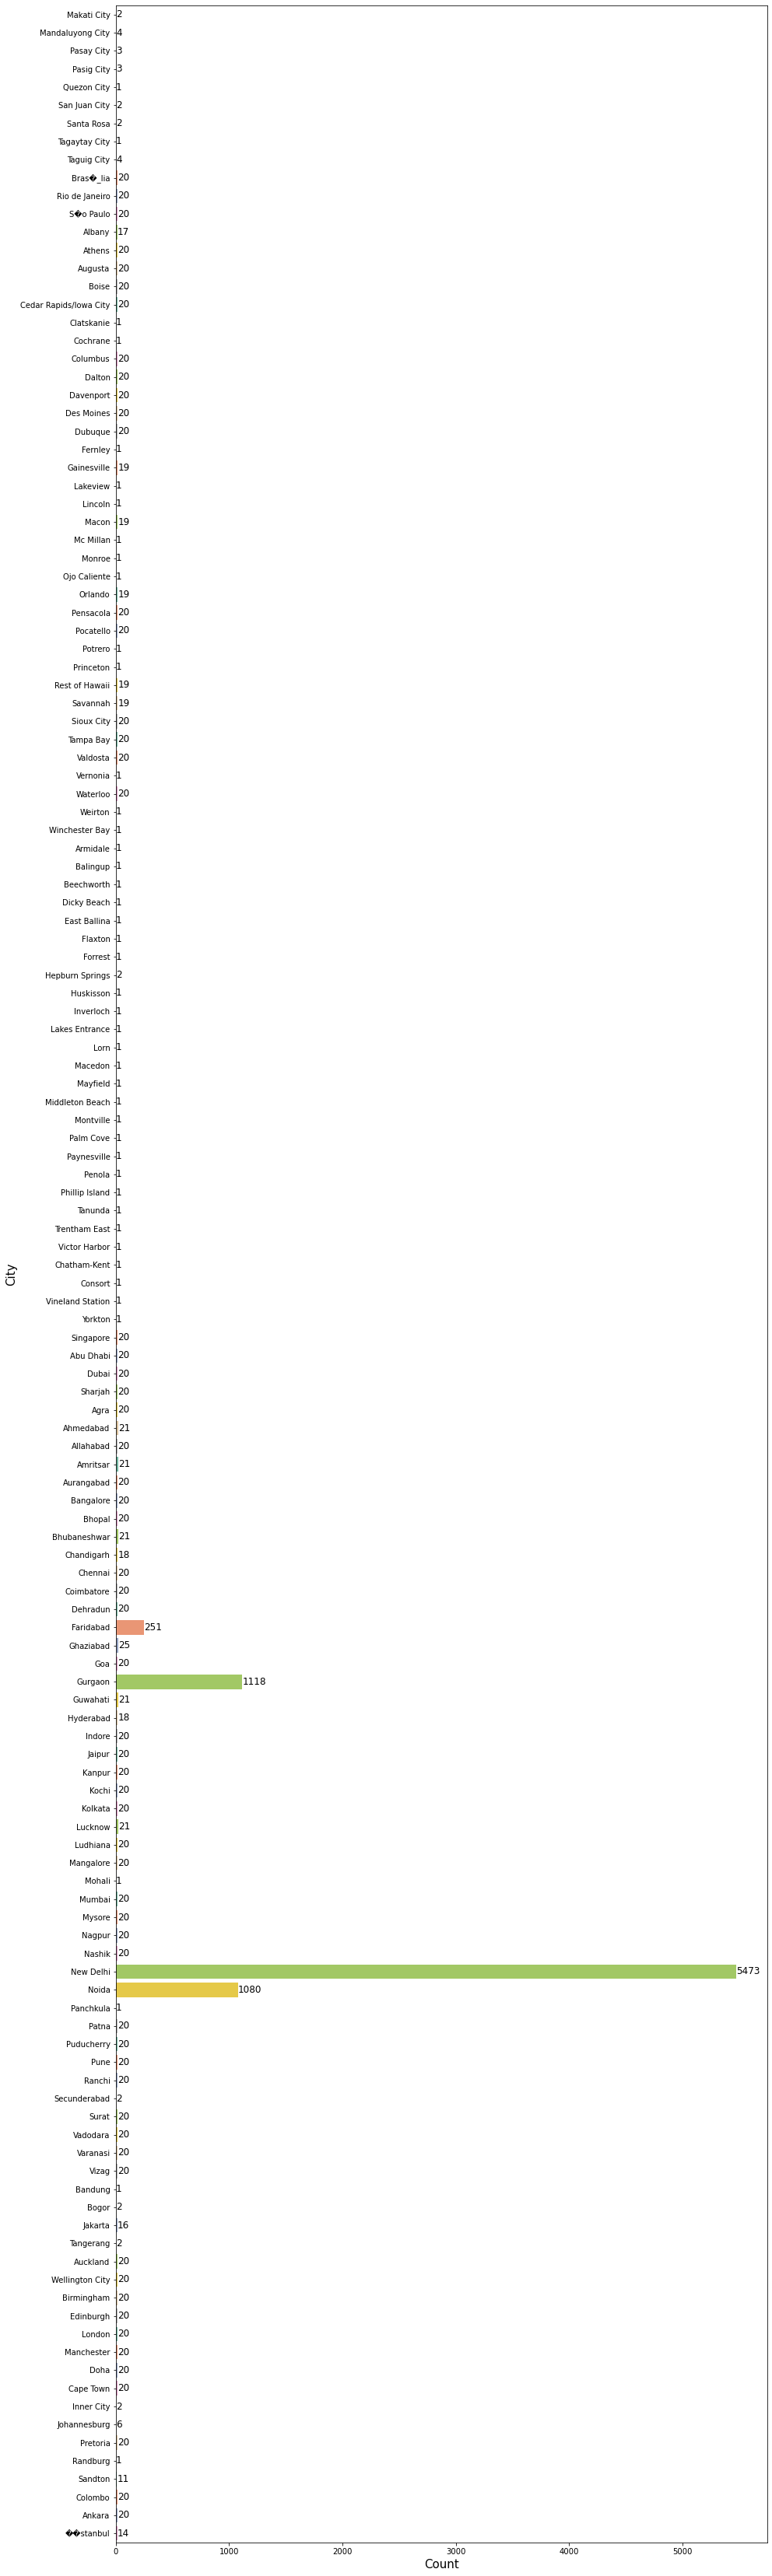

In [690]:
# Visualizing the feature 'City' in countplot

plt.figure(figsize=(15,60))
ab = sns.countplot(y=zomato['City'],palette='Set2')
plt.ylabel('City',fontsize=15)
plt.xlabel('Count',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()

### Observations

Dataset contains restaurants across the globe and the maximum count of restaurants documented are for Delhi, Gurgaon and Noida

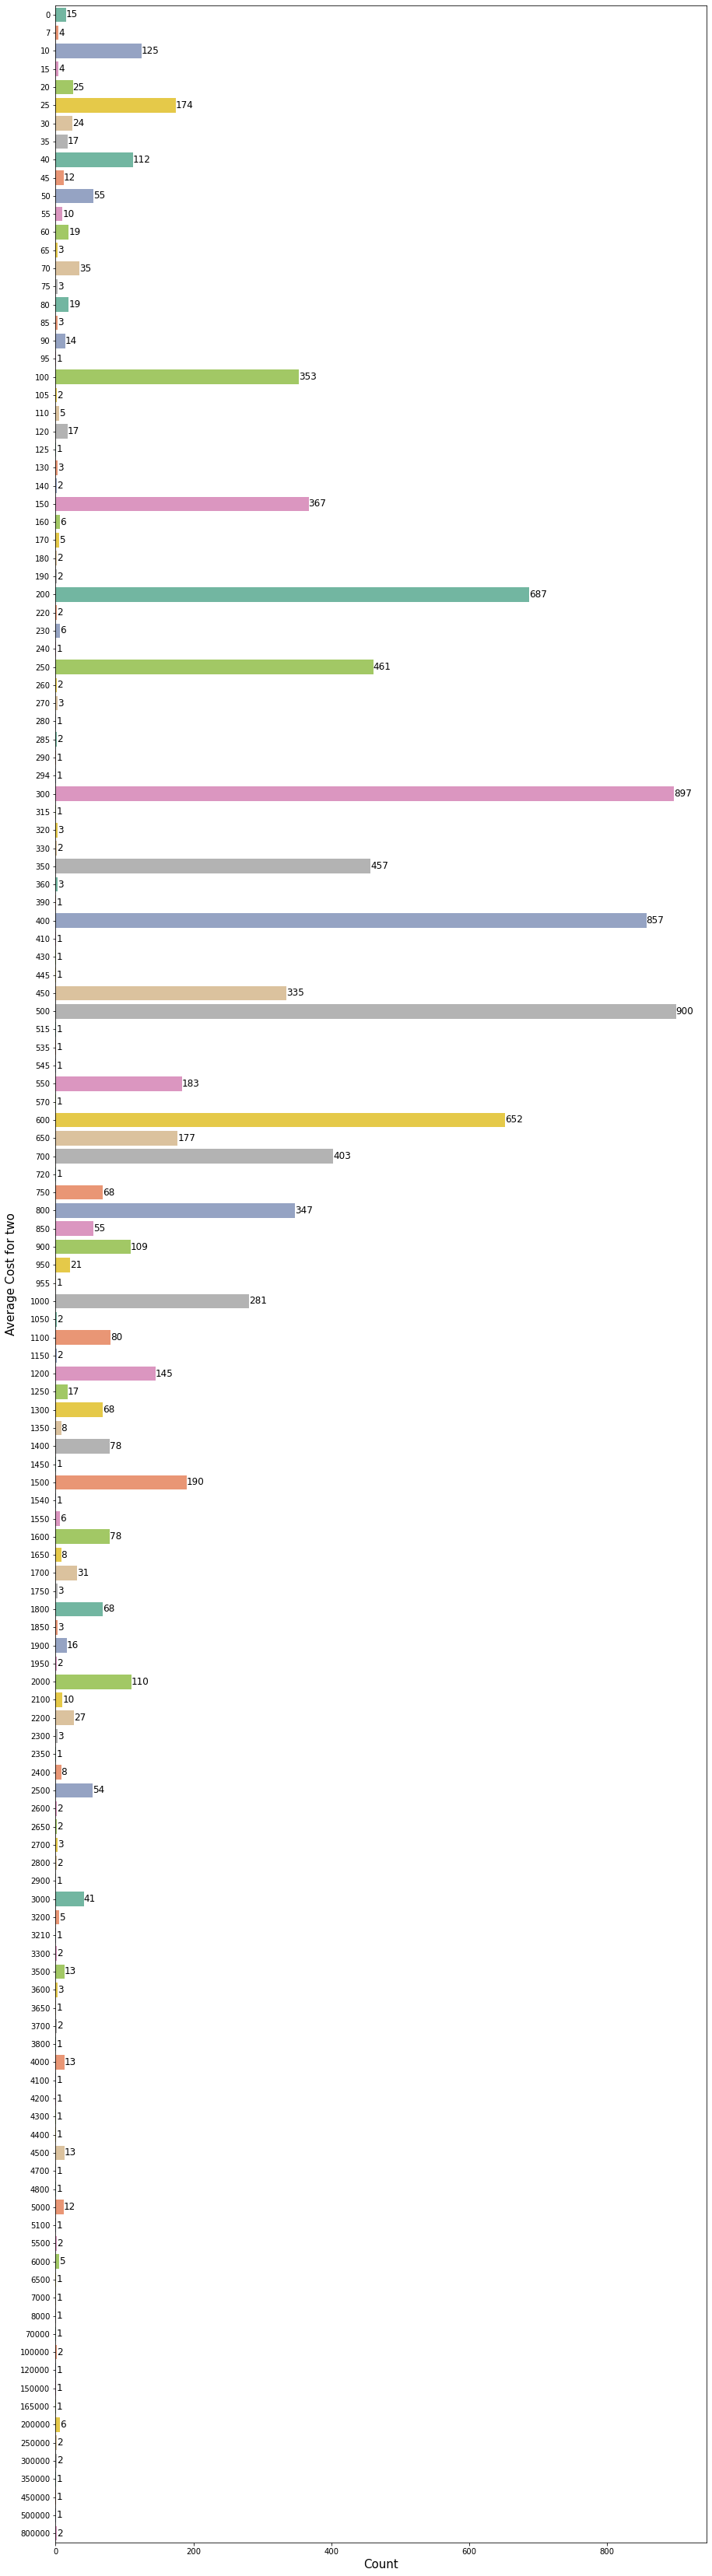

In [691]:
# Visualizing the feature 'Average Cost for two' in countplot

plt.figure(figsize=(15,60))
ab = sns.countplot(y=zomato['Average Cost for two'],palette='Set2')
plt.ylabel('Average Cost for two',fontsize=15)
plt.xlabel('Count',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()

### Observations

'Average cost for two' count is maximum in 500, 300 and 400,  currency differs in each country based on their value

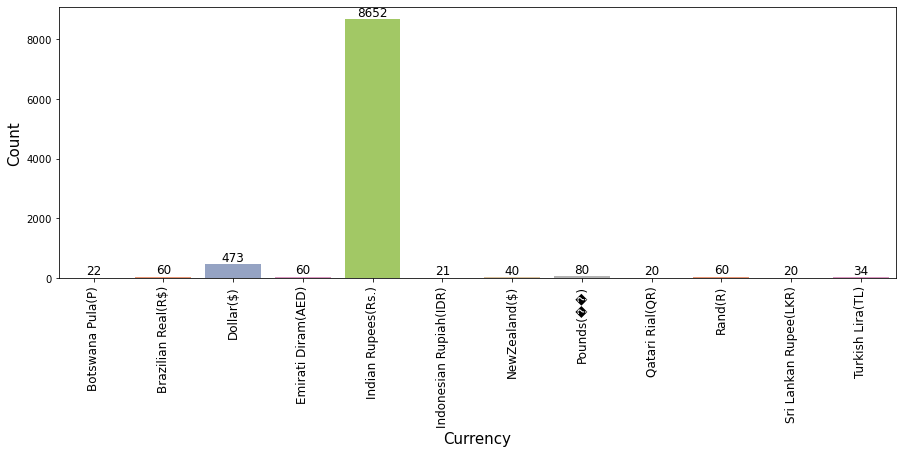

In [692]:
# Visualizing the feature 'Currency' in countplot

plt.figure(figsize=(15,5))
ab = sns.countplot(zomato['Currency'],palette='Set2')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Currency',fontsize=15)
plt.xticks(fontsize=12,rotation=90)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()

### Observations

In terms of Currency, count of Indian Rupee is maximum, as the documented restaurants are maximum in India

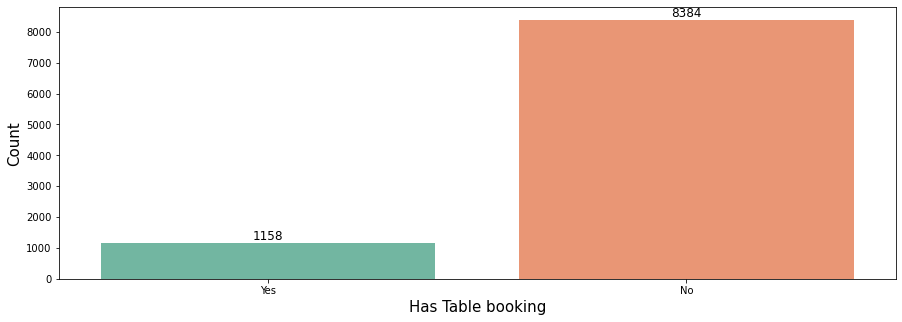

In [693]:
# Visualizing the feature 'Has Table booking' in countplot

plt.figure(figsize=(15,5))
ab = sns.countplot(zomato['Has Table booking'],palette='Set2')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Has Table booking',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()

### Observations

Based on the feature 'Has Table booking', almost 88% of restaurants dont have the option of booking table

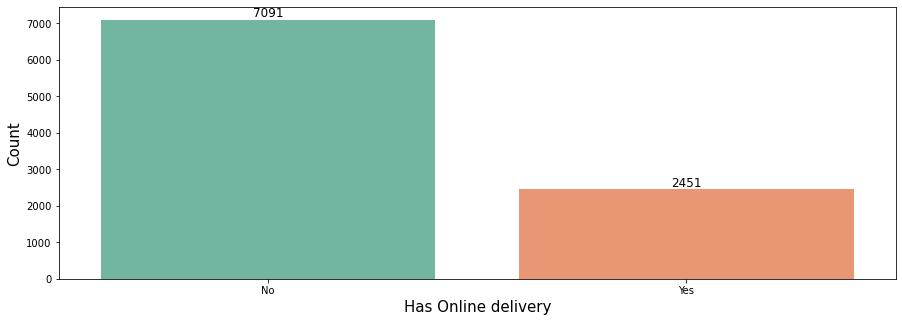

In [694]:
# Visualizing the feature 'Has Online delivery' in countplot

plt.figure(figsize=(15,5))
ab = sns.countplot(zomato['Has Online delivery'],palette='Set2')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Has Online delivery',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()

### Observations

Based on the feature 'Has Online delivery', almost 75% of restaurants dont have the option of  Online delivery

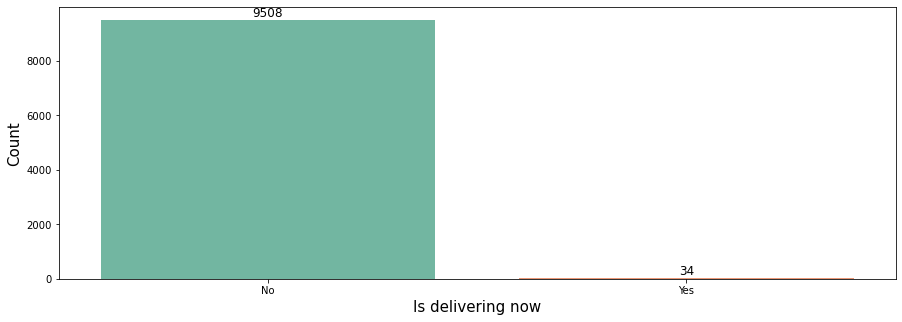

In [695]:
# Visualizing the feature 'Is delivering now' in countplot

plt.figure(figsize=(15,5))
ab = sns.countplot(zomato['Is delivering now'],palette='Set2')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Is delivering now',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()

### Observations

Count ‘No’ is maximum in the feature 'Is delivering now'

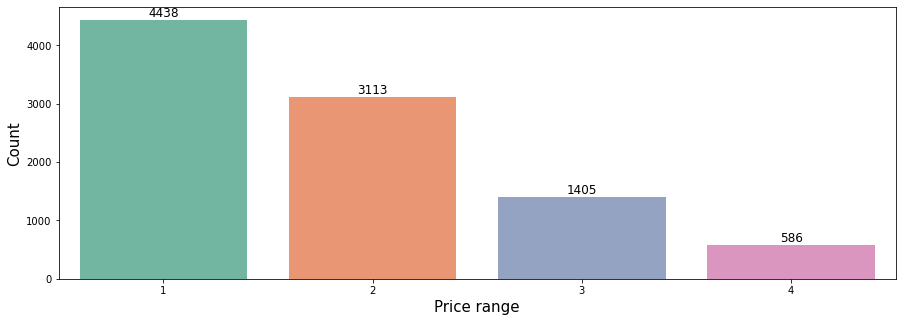

In [696]:
# Visualizing the feature 'Price range' in countplot

plt.figure(figsize=(15,5))
ab = sns.countplot(zomato['Price range'],palette='Set2')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Price range',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()

### Observations

Restaurants with Price Range as 1 is maximum, followed by 2, 3 and 4

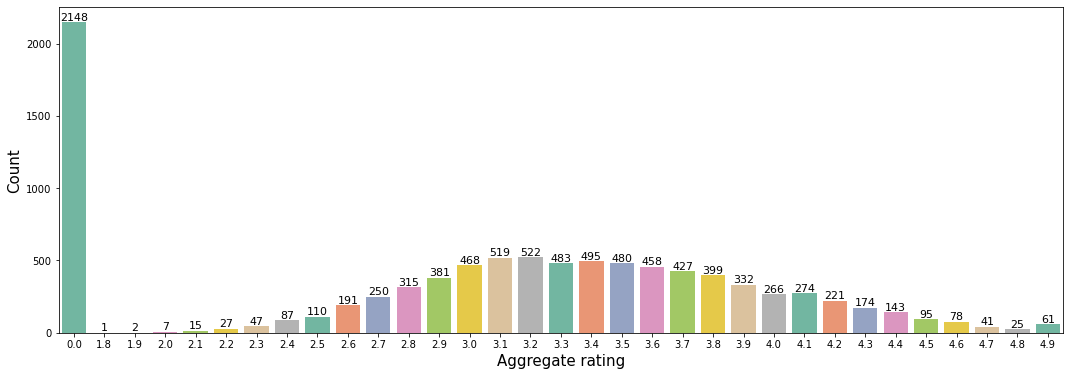

In [697]:
# Visualizing the feature 'Aggregate rating' in countplot

plt.figure(figsize=(18,6))
ab = sns.countplot(zomato['Aggregate rating'],palette='Set2')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Aggregate rating',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=11)
plt.show()

### Observations

In Aggregate Rating column,  rating of 0 has the maximum count

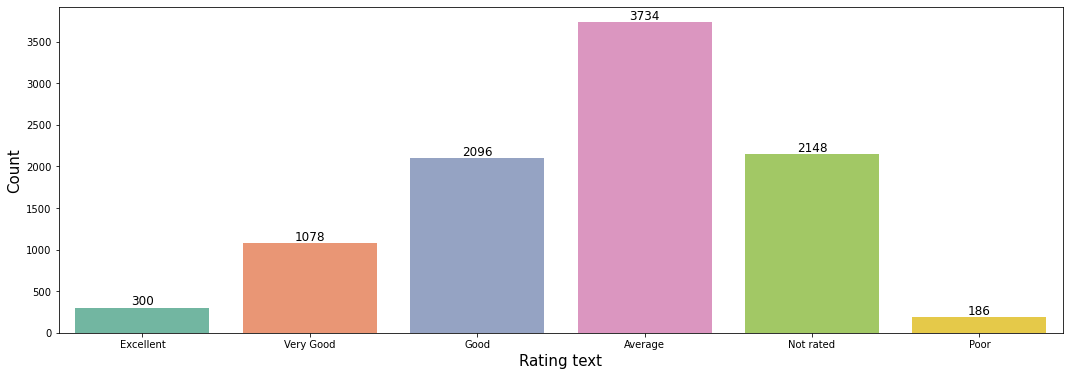

In [698]:
# Visualizing the feature 'Rating text' in countplot

plt.figure(figsize=(18,6))
ab = sns.countplot(zomato['Rating text'],palette='Set2')
plt.xlabel('Rating text',fontsize=15)
plt.ylabel('Count',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()

### Observations

Based on rating text, most of the restaurants which is 3737 have been rated as Average and 2148 restaurants are not rated

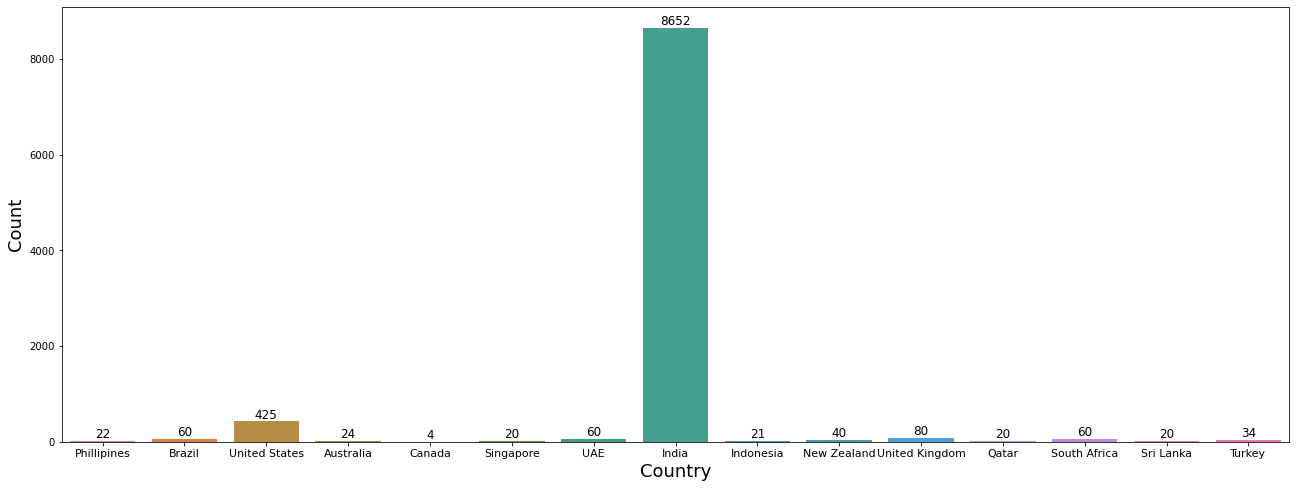

In [699]:
# Visualizing the feature 'Country' in countplot

plt.figure(figsize=(22,8))
ab = sns.countplot(zomato['Country'],palette='husl')
plt.xlabel('Country',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xticks(fontsize=11)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()

### Observations

Maximum restaurants are documented from India, which is almost 94% of the data are restaurants from India

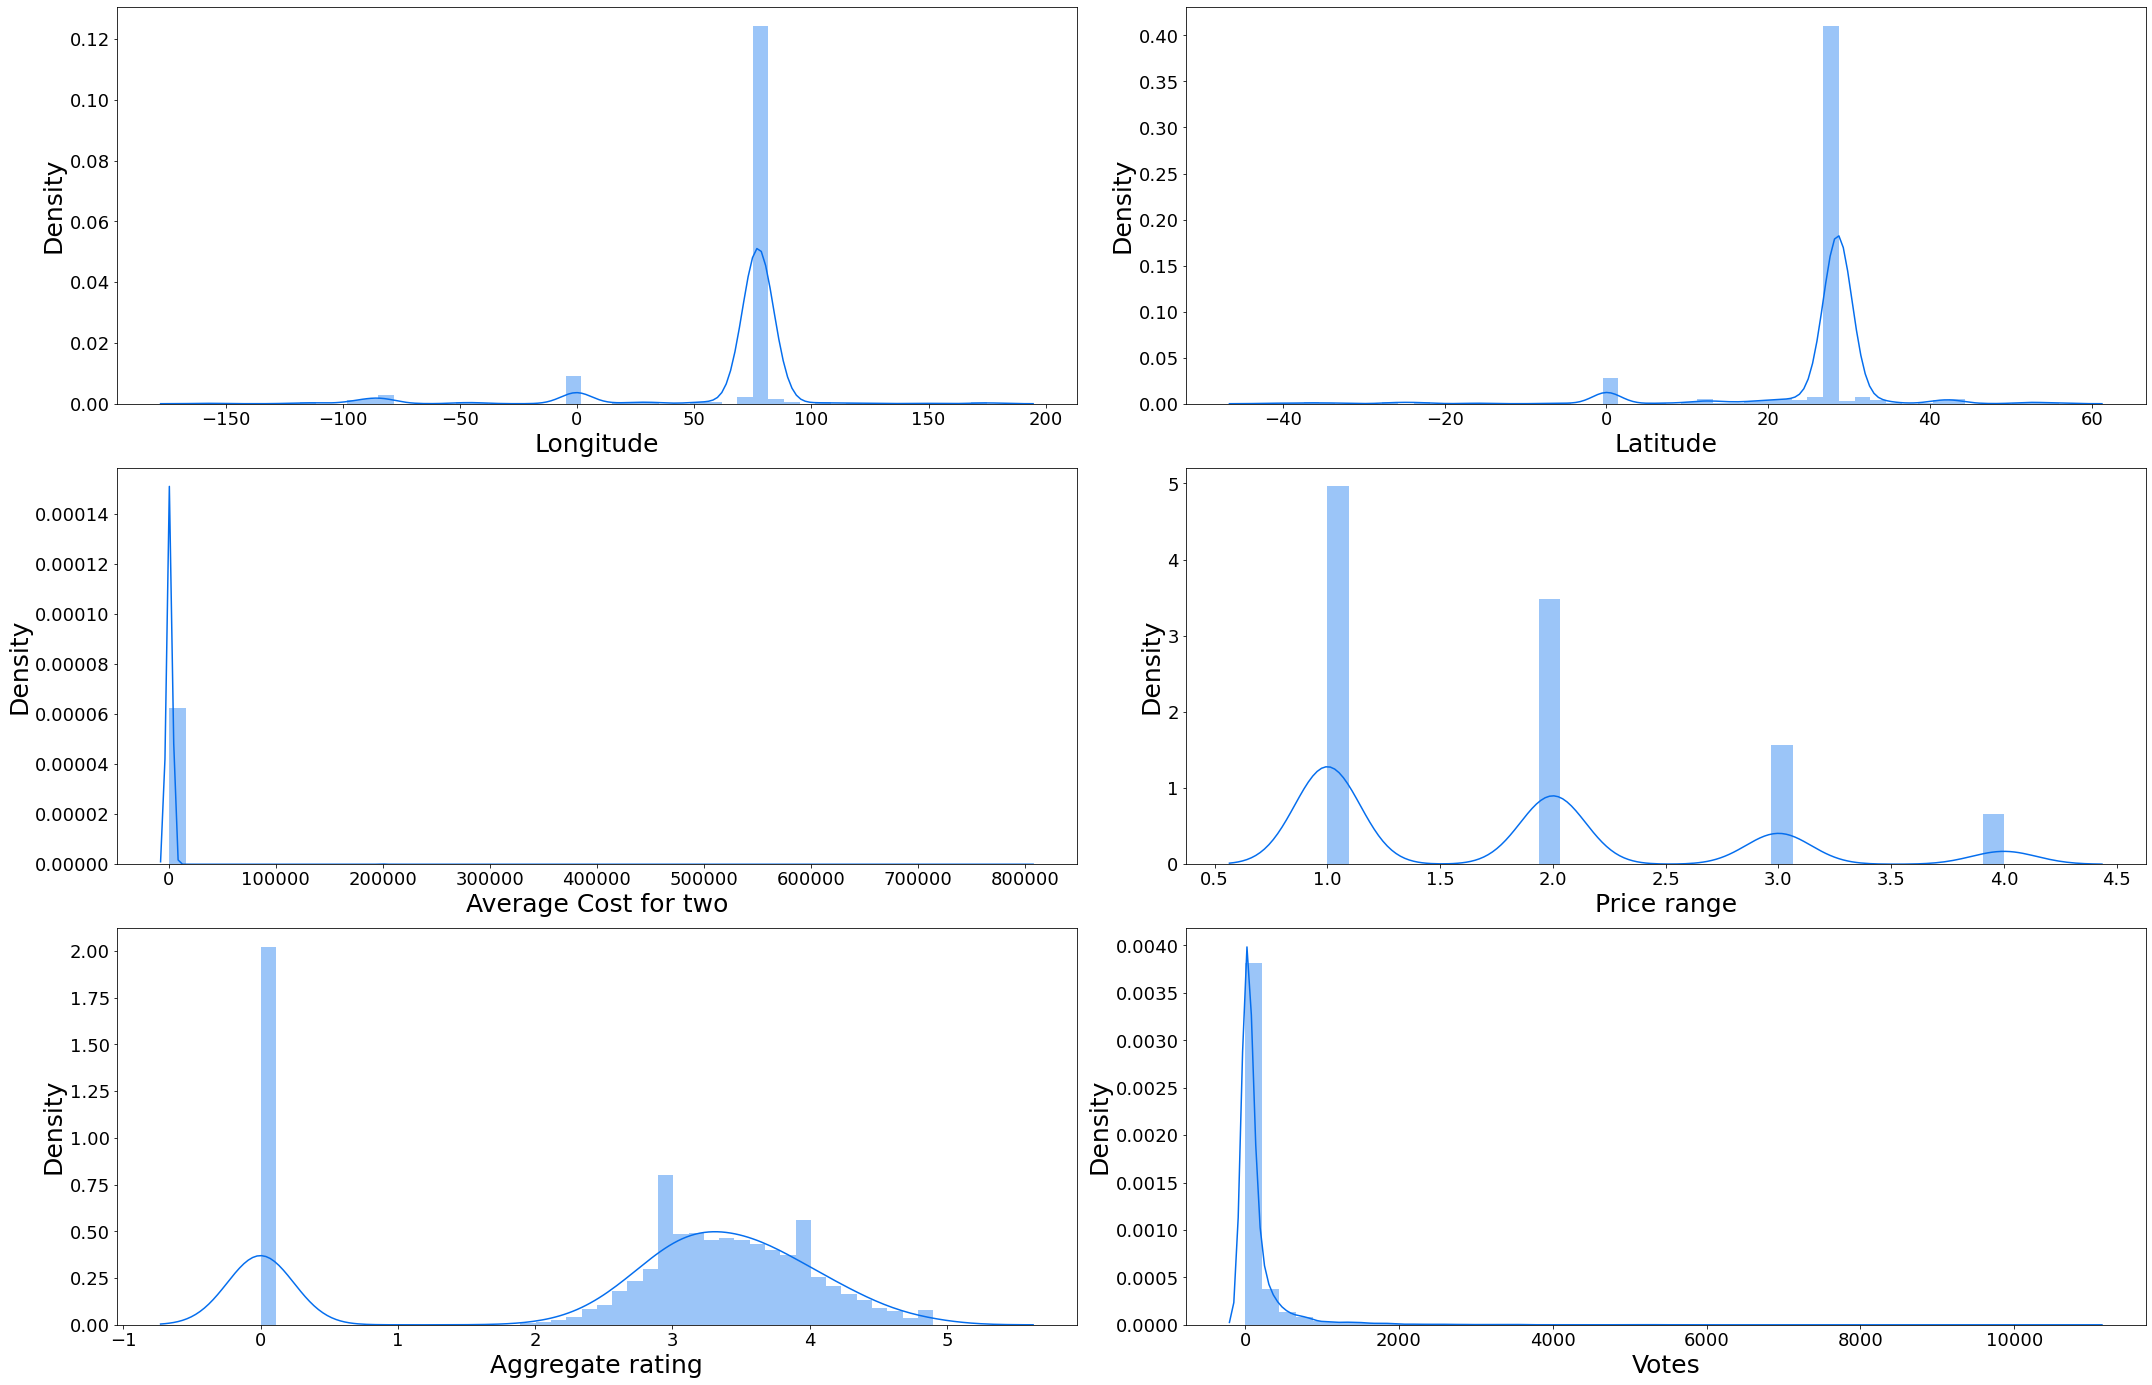

In [700]:
# Checking the distribution of the numerical features using distplot

plt.figure(figsize=(30,25))
plot_num=1

for i in zomato_num:
    if plot_num<=6:
        sub=plt.subplot(3,2,plot_num)
        sns.distplot(zomato[i],color='#056eee')
        plt.xlabel(i,fontsize=25)
        plt.ylabel('Density',fontsize=25)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
    plot_num+=1
plt.tight_layout()

### Observations

Above distribution plot shows the features Country Code, Average Cost for two, Price range and Votes are skewed towards right

Features Longitude, Latitude and Aggregate rating are skewed towards left

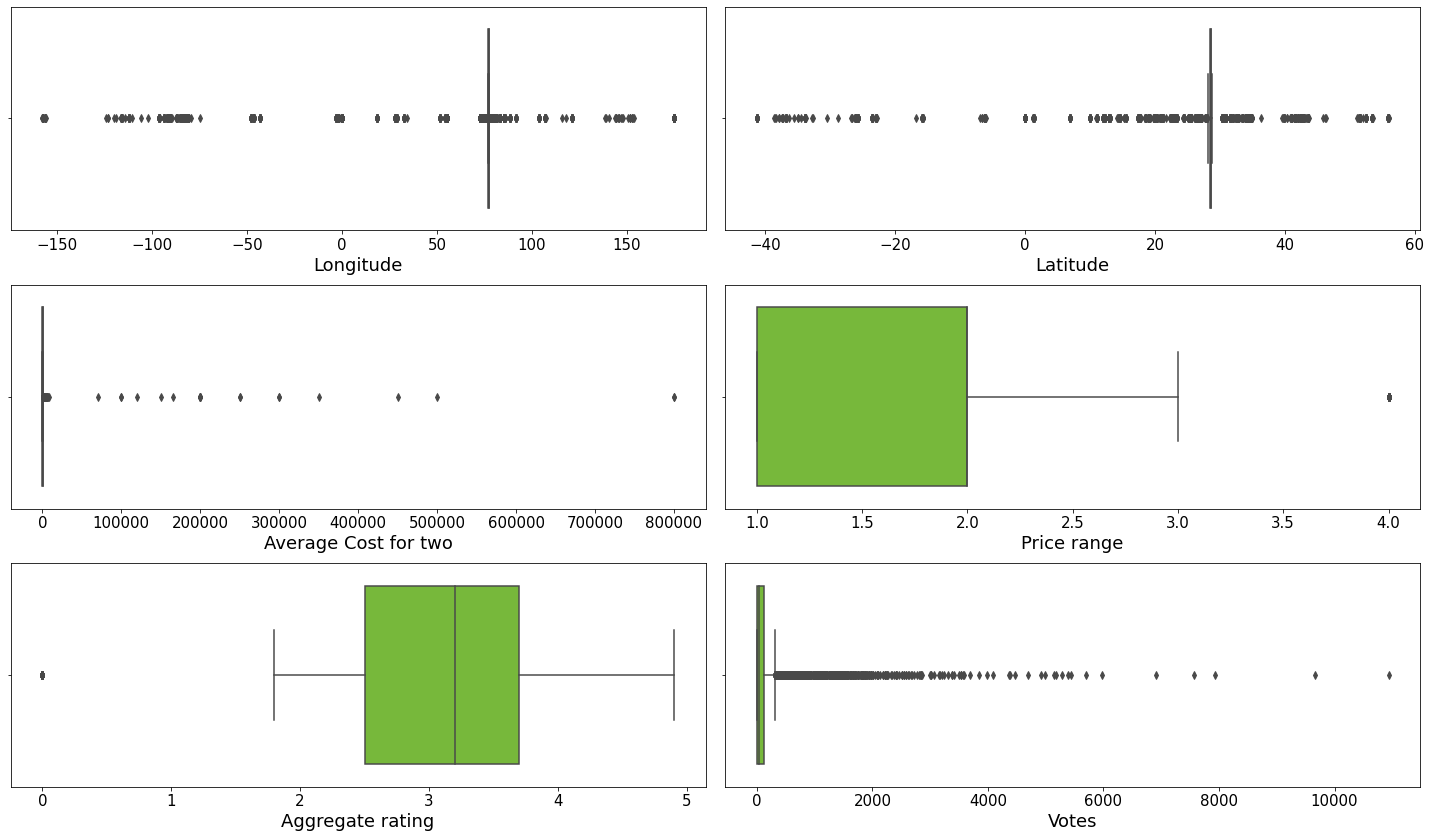

In [701]:
# Visualizing the dataset with Boxplot to check outliers

plt.figure(figsize=(20,15))
st = 1
for i in zomato_num:
    if st <=6:
        sub = plt.subplot(3,2,st)
        sns.boxplot(zomato[i],color='#76cd26')
        plt.xlabel(i,fontsize=18)
        plt.xticks(fontsize=15)
    st+=1
plt.tight_layout()

### Observations

Based on boxplot, we can observe outliers are present in the features Country Code, Longitude, Latitude, Average cost for two,
Votes, Price range and Aggregate rating

## Bivariate and Multivariate Analysis

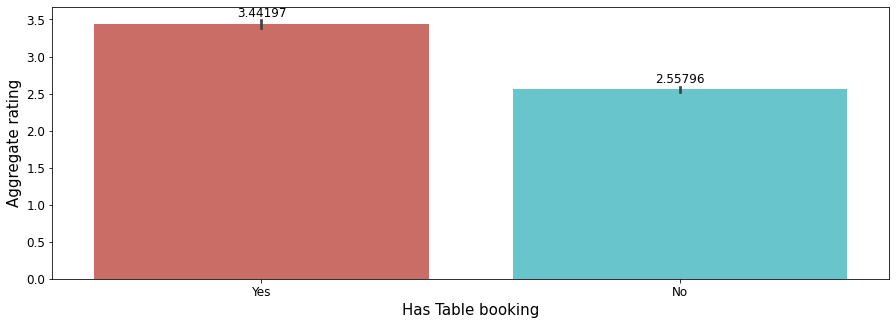

In [702]:
# Visualizing the Has Table booking Vs Aggregate rating by barplot

plt.figure(figsize=(15,5))
cat=sns.barplot(data=zomato, x='Has Table booking',y='Aggregate rating',palette='hls')
plt.xlabel("Has Table booking",fontsize=15)
plt.ylabel("Aggregate rating",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=4)
plt.show()

### Observations

Restaurants which have the option of booking table got good aggregated rating compared with restaurants which as no option


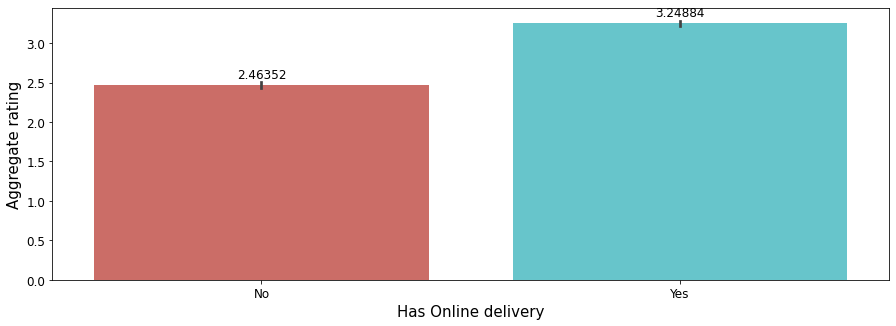

In [703]:
# Visualizing the Has Online delivery Vs Aggregate rating by barplot

plt.figure(figsize=(15,5))
cat=sns.barplot(data=zomato, x='Has Online delivery',y='Aggregate rating',palette='hls')
plt.xlabel("Has Online delivery",fontsize=15)
plt.ylabel("Aggregate rating",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=4)
plt.show()

### Observations

Restaurants which have the option of Online Delivery got good aggregated rating compared with restaurants which as No Online Delivery

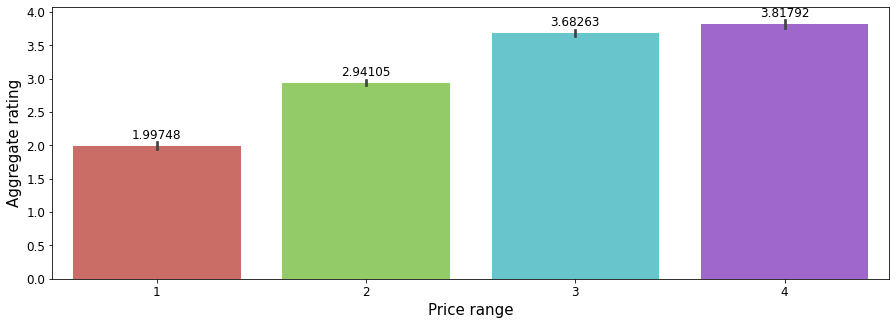

In [704]:
# Visualizing the Price range Vs Aggregate rating by barplot

plt.figure(figsize=(15,5))
cat=sns.barplot(data=zomato, x='Price range',y='Aggregate rating',palette='hls')
plt.xlabel("Price range",fontsize=15)
plt.ylabel("Aggregate rating",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=4)
plt.show()

### Observations

When we compare Overall Price range vs Aggregate rating

Restaurants which has Price range of 4 and 3 have an aggregate rating of 3.8 and 3.6 which is good

Restaurants which has Price range of 2 have an aggregate rating of 2.9 which is average

Restaurants which has Price range of 1 have an aggregate rating of 1.9 which is poor

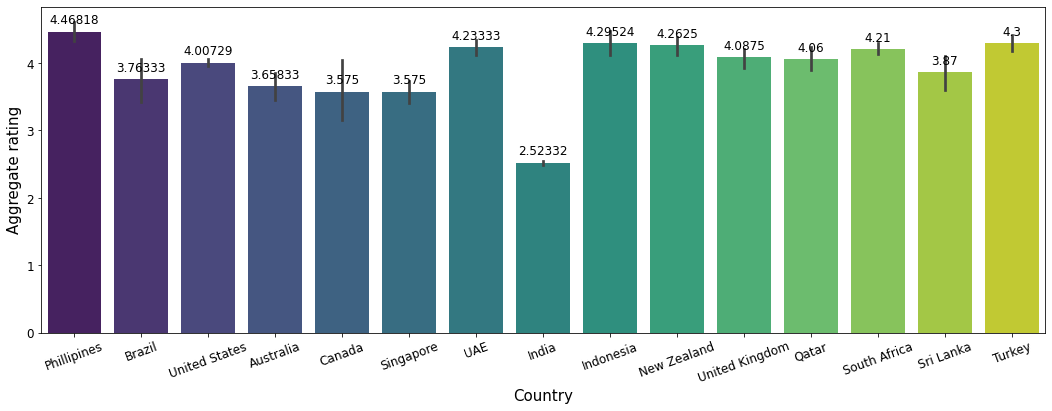

In [705]:
# Visualizing the Country Vs Aggregate rating by barplot

plt.figure(figsize=(18,6))
cat=sns.barplot(data=zomato, x='Country',y='Aggregate rating',palette='viridis')
plt.xlabel("Country",fontsize=15)
plt.ylabel("Aggregate rating",fontsize=15)
plt.xticks(fontsize=12,rotation=20)
plt.yticks(fontsize=12)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

### Observations

Country with highest aggregated rating is Phillipines with 4.4, Turkey with 4.3, Indonesia, New Zealand, UAE and South  Africa with 4.2

Country with the lowest rating is India

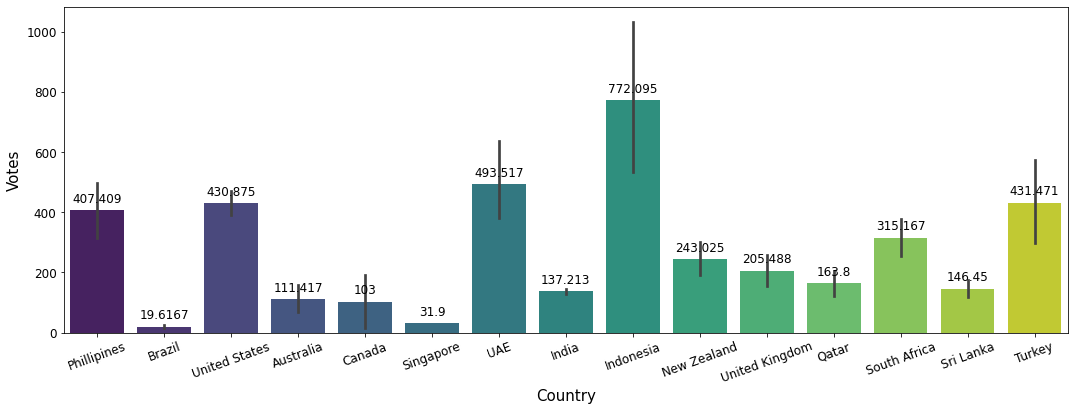

In [706]:
# Visualizing the Country Vs Votes by barplot

plt.figure(figsize=(18,6))
cat=sns.barplot(data=zomato, x='Country',y='Votes',palette='viridis')
plt.xlabel("Country",fontsize=15)
plt.ylabel("Votes",fontsize=15)
plt.xticks(fontsize=12,rotation=20)
plt.yticks(fontsize=12)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

### Observations

Based on Customer's Votes on Restaurants, we can observe

Most of the customer's in Indonesia, UAE, Turkey, United States, Phillipines and South Africa have voted about the restaurants,
which is one of the reason as the Aggregate ratings are high in these countries

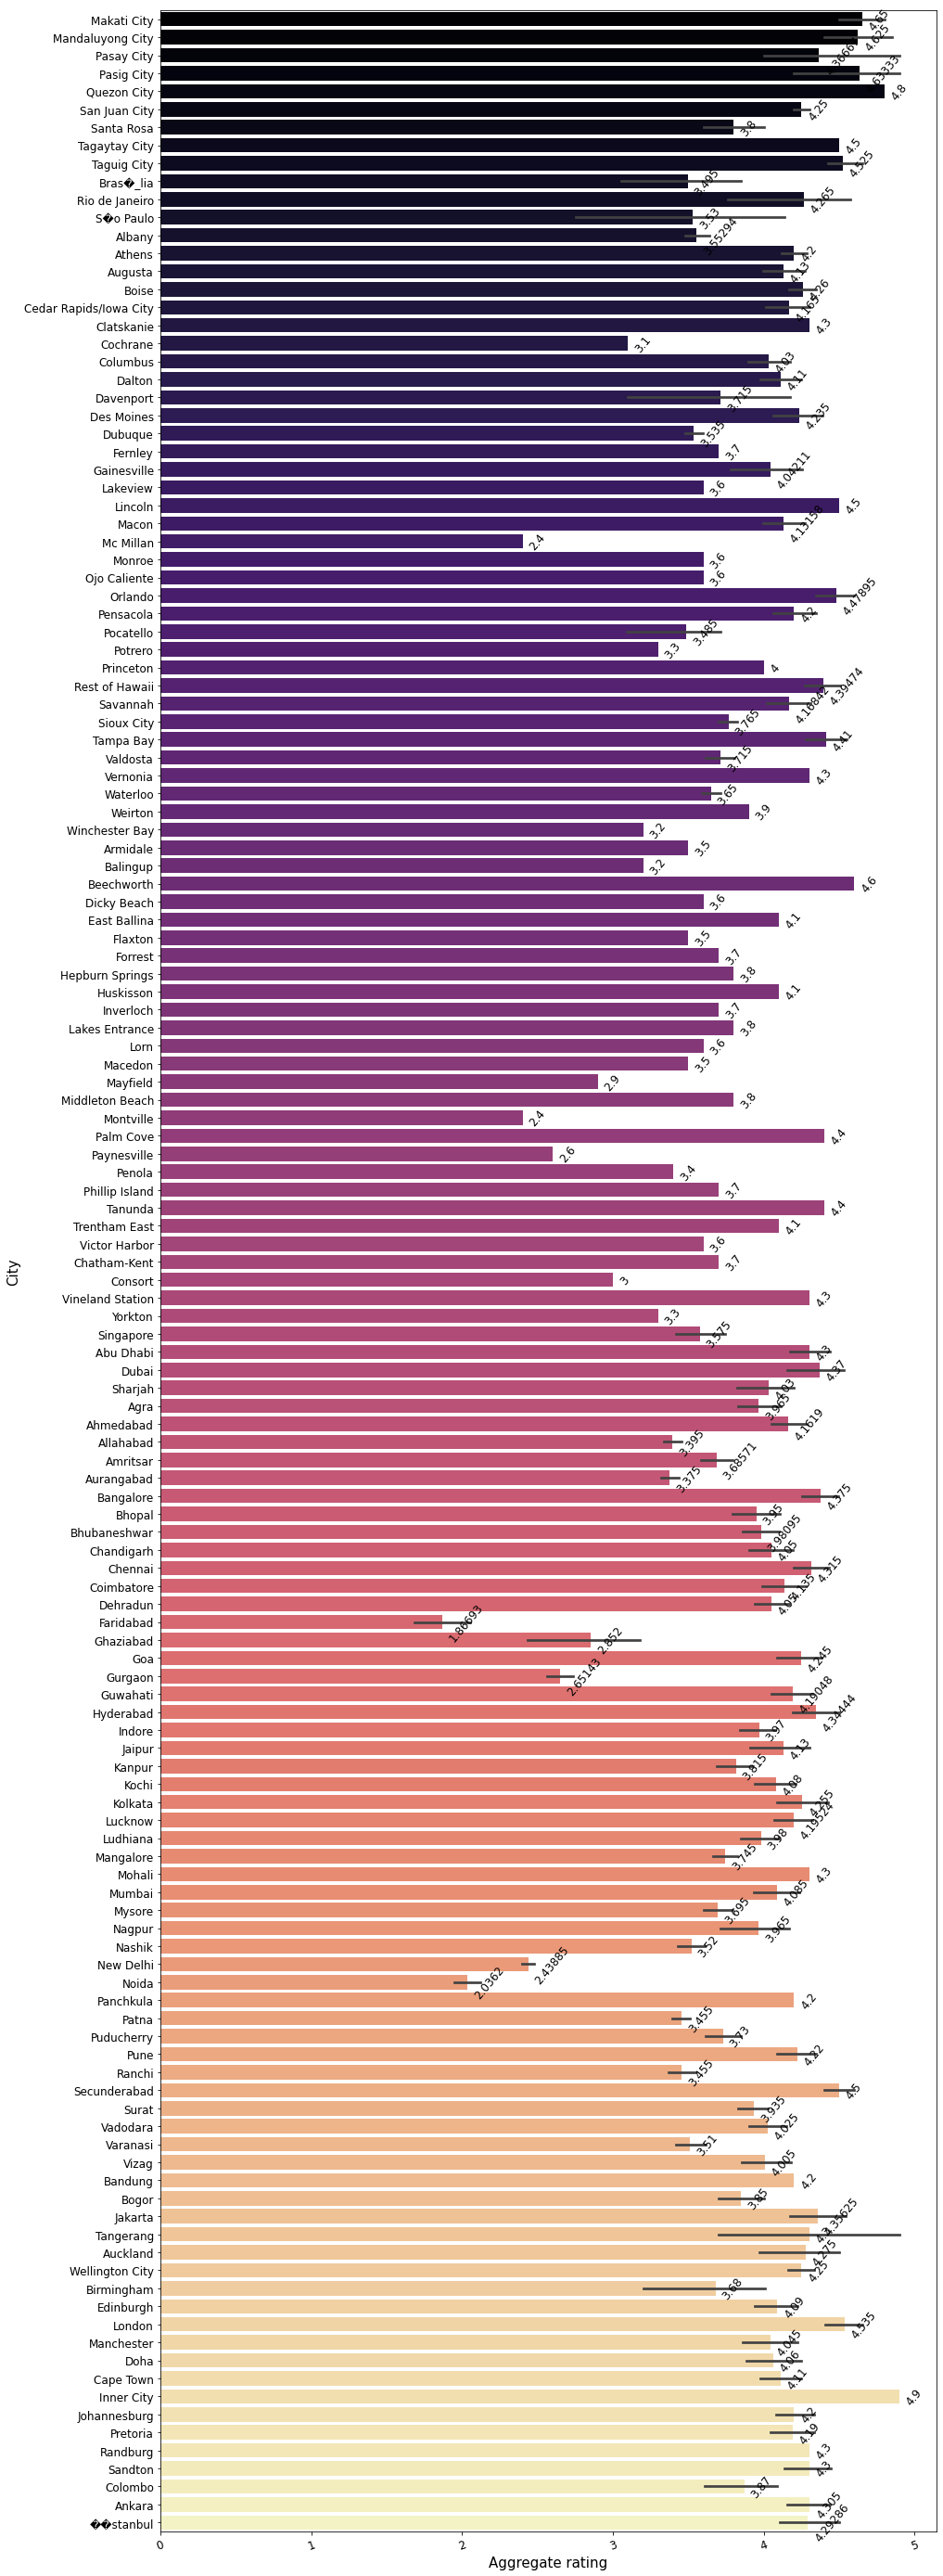

In [707]:
# Visualizing the City Vs Aggregate rating by barplot

plt.figure(figsize=(15,50))
cat=sns.barplot(data=zomato, y='City',x='Aggregate rating',palette='magma')
plt.xlabel("Aggregate rating",fontsize=15)
plt.ylabel("City",fontsize=15)
plt.xticks(fontsize=12,rotation=20)
plt.yticks(fontsize=12)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5,rotation=50)
plt.show()

### Observations

City with highest Aggregate ratings are Inner City 4.9, Quezon City 4.8, Beechworth 4.6, London, Lincoln and Secunderabad with 4.5

City with lowest Aggregate ratings are Faridabad 1.8 and Noida 2.0

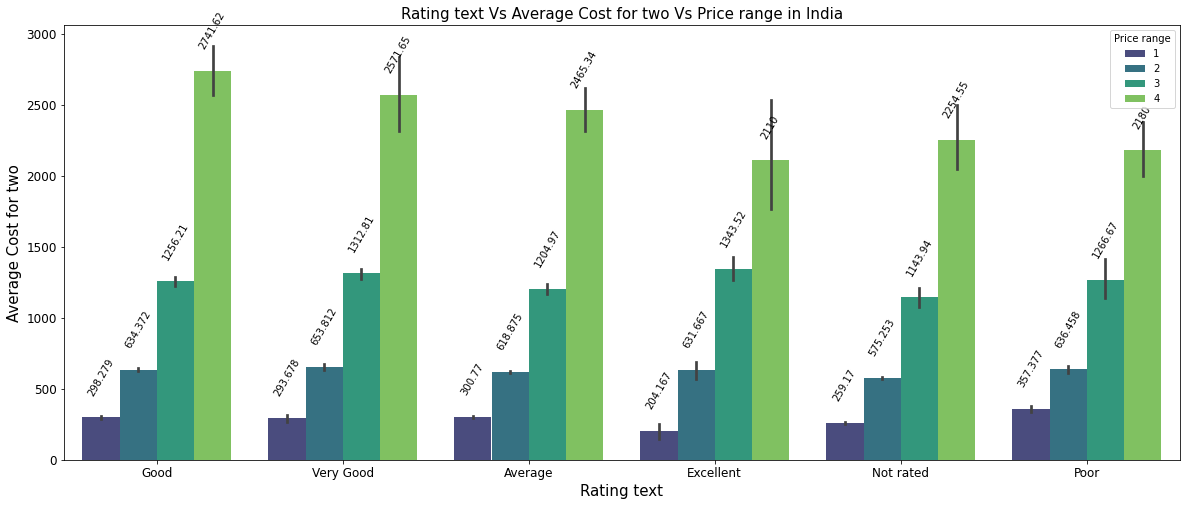

In [708]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in India by barplot


filter = zomato[zomato['Country']=='India']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='viridis')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in India',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=20,rotation=60)
plt.show()

### Observations

Based on above barplot, Rating text Vs Average Cost for two Vs Price range in India, we can observe

In India, it is possible to get an excellent food at an average cost for two is given below with Price Range(Indian Rupee)   

Price Range 1 - 204.16

Price Range 2 - 631.66

Price Range 3 - 1343.52

Price Range 4 - 2110

No of Customer's who have Not Rated is very high and above price range changes if we have those actual data 

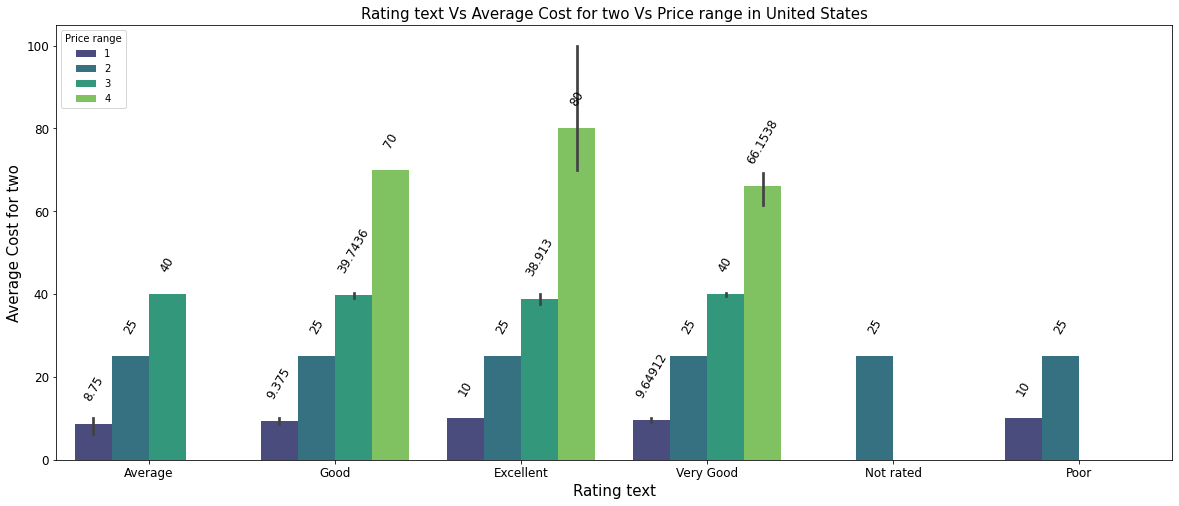

In [709]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in United States by barplot


filter = zomato[zomato['Country']=='United States']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='viridis')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in United States',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=20,rotation=60)
plt.show()

### Observations

In United States, restaurants which serves excellent food at an average cost for two is given below with Price Range(Dollar)

Price Range 1 - 10

Price Range 2 - 25

Price Range 3 - 38.91

Price Range 4 - 8

Restaurants which has been rated as Very Good and Good are more similar with above Price Range

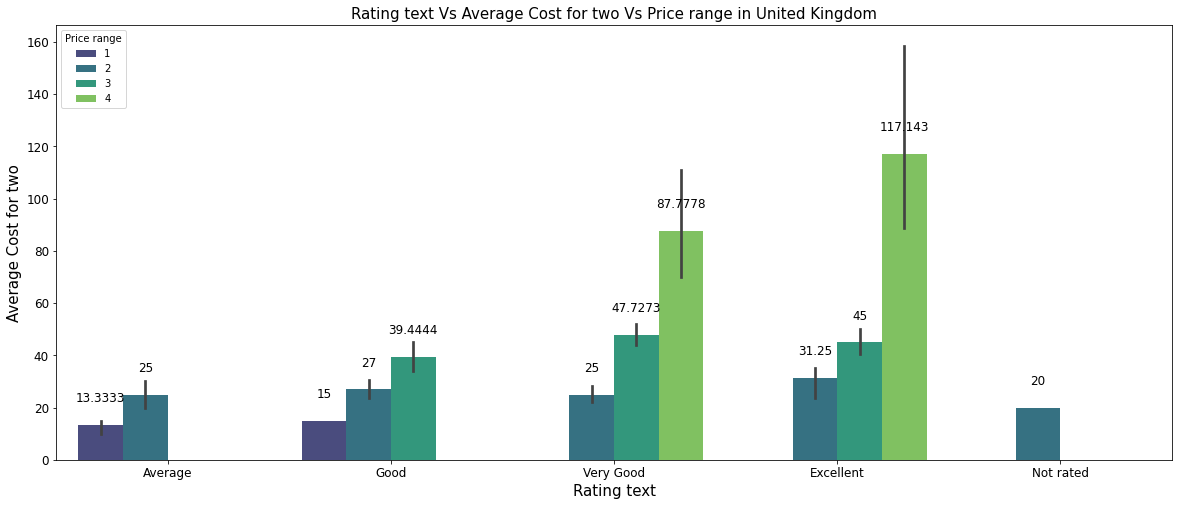

In [710]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in United Kingdom by barplot


filter = zomato[zomato['Country']=='United Kingdom']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='viridis')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in United Kingdom',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=20)
plt.show()

### Observations

In United Kingdom, restaurants which serves excellent food at an average cost for two is given below with Price Range(Pounds)

Price Range 1 - 15 (Rating - Good)

Price Range 2 - 31.25

Price Range 3 - 45

Price Range 4 - 117.14

Difference between Very Good and Excellent is high for Price Range 4

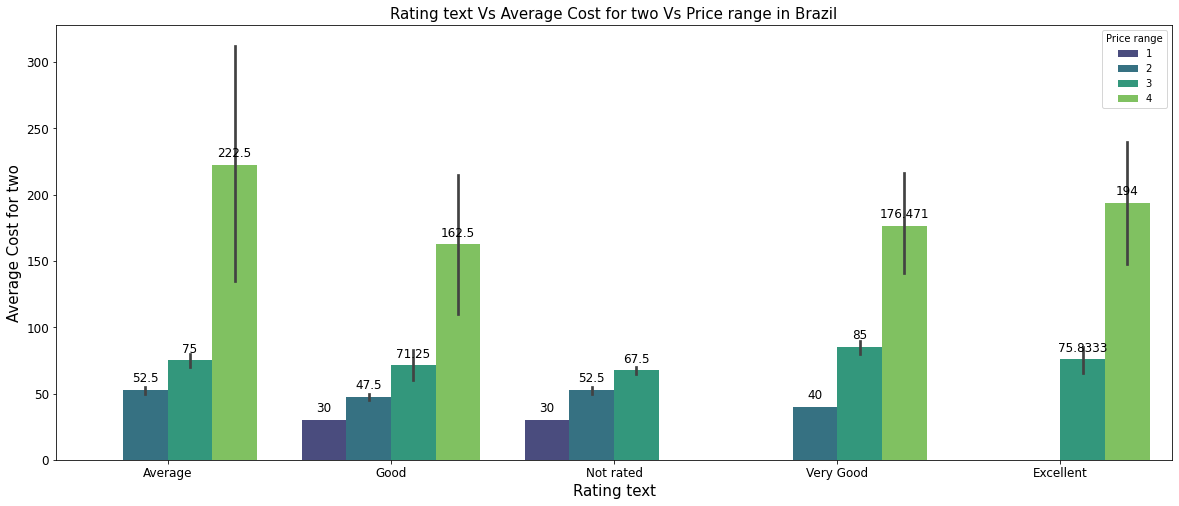

In [711]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Brazil by barplot


filter = zomato[zomato['Country']=='Brazil']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='viridis')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Brazil',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

### Observations

In Brazil, to get an excellent food at an average cost for two is given below with Price Range(Brazilian Real)

Price Range 1 - 30 (Rating - Good)

Price Range 2 - 40 (Rating - Very Good)

Price Range 3 - 75.8 (Rating - Excellent)

Price Range 4 - 194 ((Rating - Excellent)

Difference between Price Range 3 and 4 is very high across all the Ratings

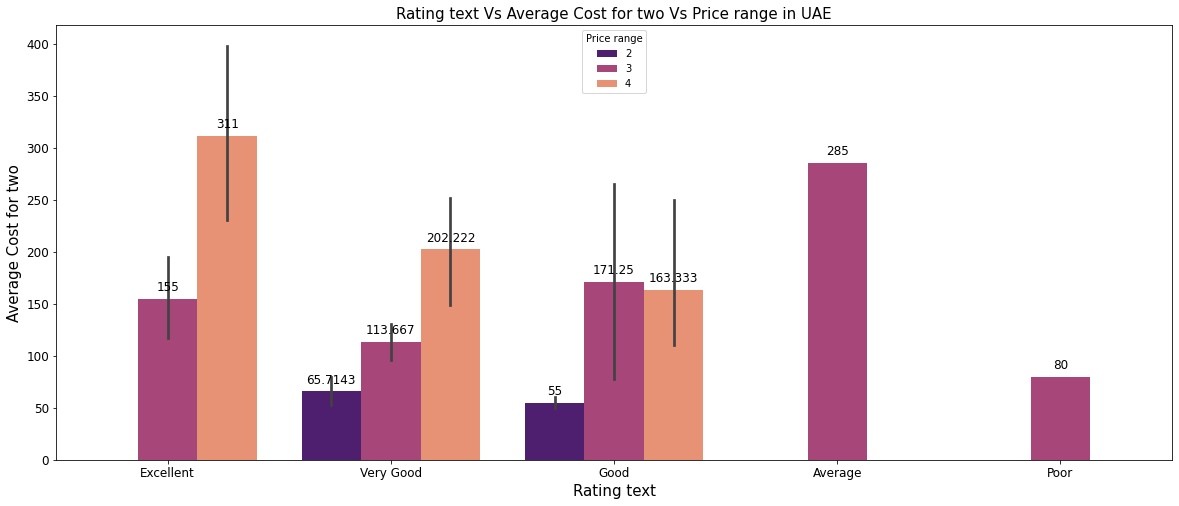

In [712]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in UAE by barplot


filter = zomato[zomato['Country']=='UAE']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='magma')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in UAE',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

### Observations

In UAE, Price Range is classified into 2,3 and 4

To get an excellent food at an average cost(Emirati Diram) for two as follows

Price Range 2 - 65.71 (Rating - Very Good)

Price Range 3 - 155 (Rating - Excellent)

Price Range 4 - 311 ((Rating - Excellent)

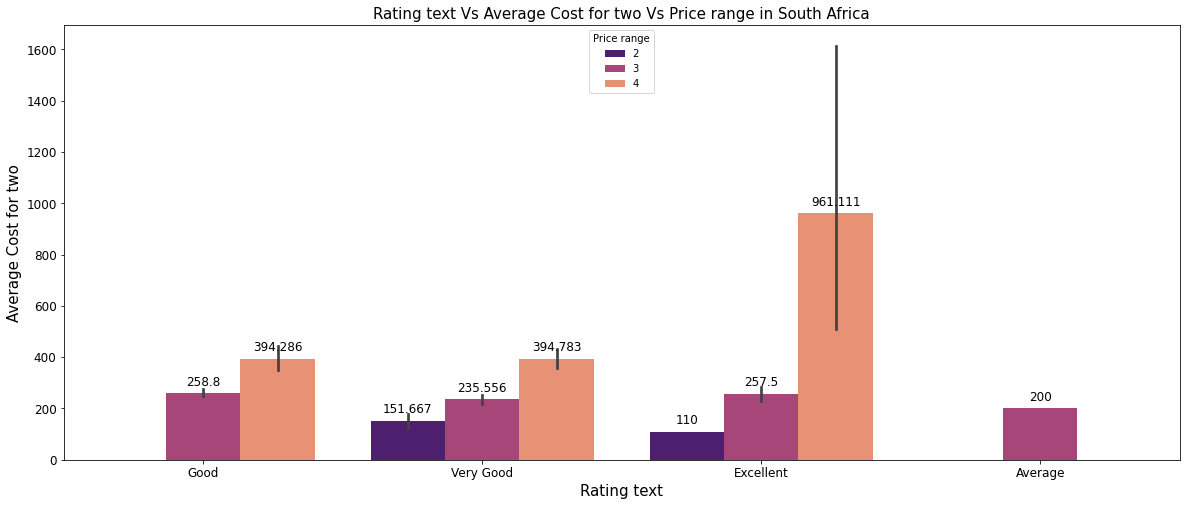

In [714]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in South Africa by barplot


filter = zomato[zomato['Country']=='South Africa']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='magma')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in South Africa',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

### Observations

In South Africa, Price Range is classified into 2,3 and 4

To get an excellent food at an average cost(Rand) for two as follows

Price Range 2 - 110 (Rating -Excellent)

Price Range 3 - 257.5 (Rating - Excellent)

Price Range 4 - 961.1 ((Rating - Excellent
                        
Price Range difference between 3 and 4 is very high

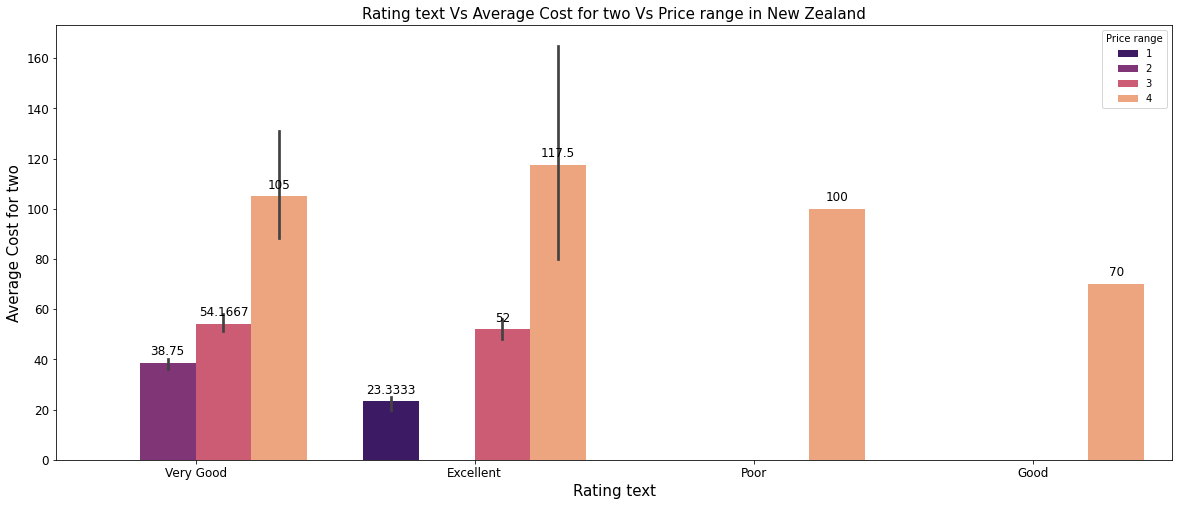

In [715]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in New Zealand by barplot


filter = zomato[zomato['Country']=='New Zealand']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='magma')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in New Zealand',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

### Observations

In New Zealand, it is possible to get an excellent food at an average cost for two is given below with Price Range(NewZealand($))

Price Range 1 - 23.3 (Rating Excellent)

Price Range 2 - 38.75 (Rating Very Good)

Price Range 3 - 52 (Rating Excellent)

Price Range 4 - 117.5 (Rating Excellent)

Price difference between 3 nd 4 is very high

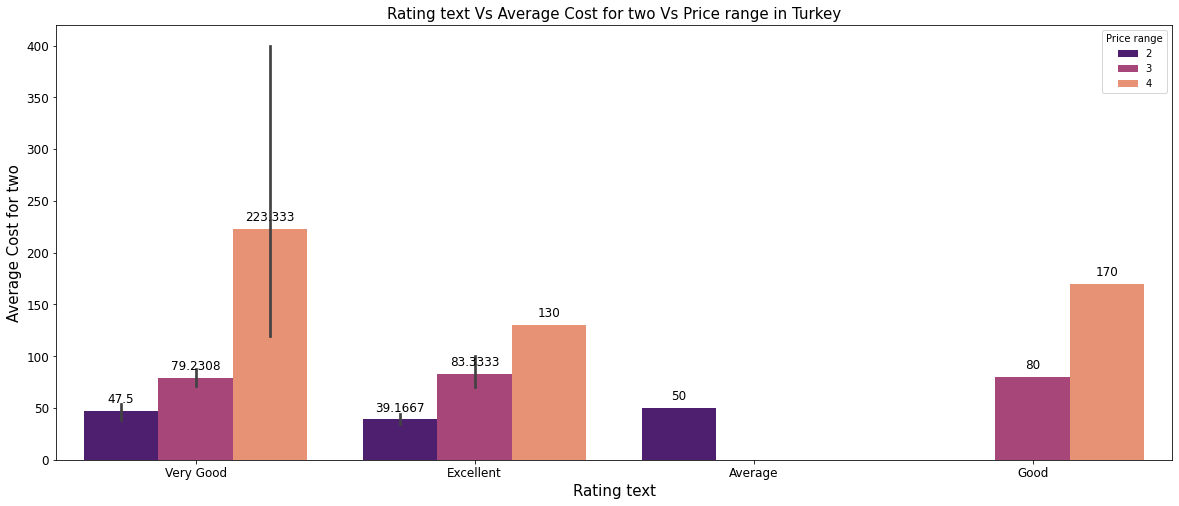

In [716]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Turkey by barplot


filter = zomato[zomato['Country']=='Turkey']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='magma')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Turkey',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

### Observations

In Turkey, Price Range is classified into 2,3 and 4

To get an excellent food at an average cost(Turkish Lira) for two as follows

Price Range 2 - 39.16 (Rating -Excellent)

Price Range 3 - 83.33 (Rating - Excellent)

Price Range 4 - 130 ((Rating - Excellent

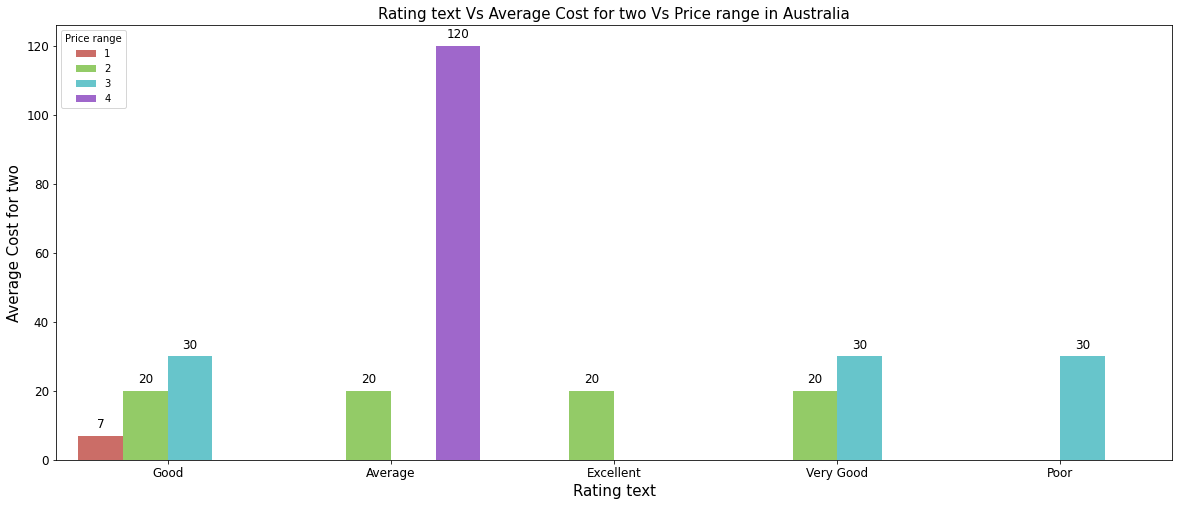

In [717]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Australia by barplot


filter = zomato[zomato['Country']=='Australia']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='hls')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Australia',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

### Observations

In Australia, most of the restaurants in Price Range 2 is same 20(Dollar) and vastly rated as Average, Good, Very Good and Excellent

Price Range 1 - 7  (Rating Good)

Price Range 3 -  30(Rating Very Good, Good and Poor ) 

Price Range 4 - 120(Rating Average ) 


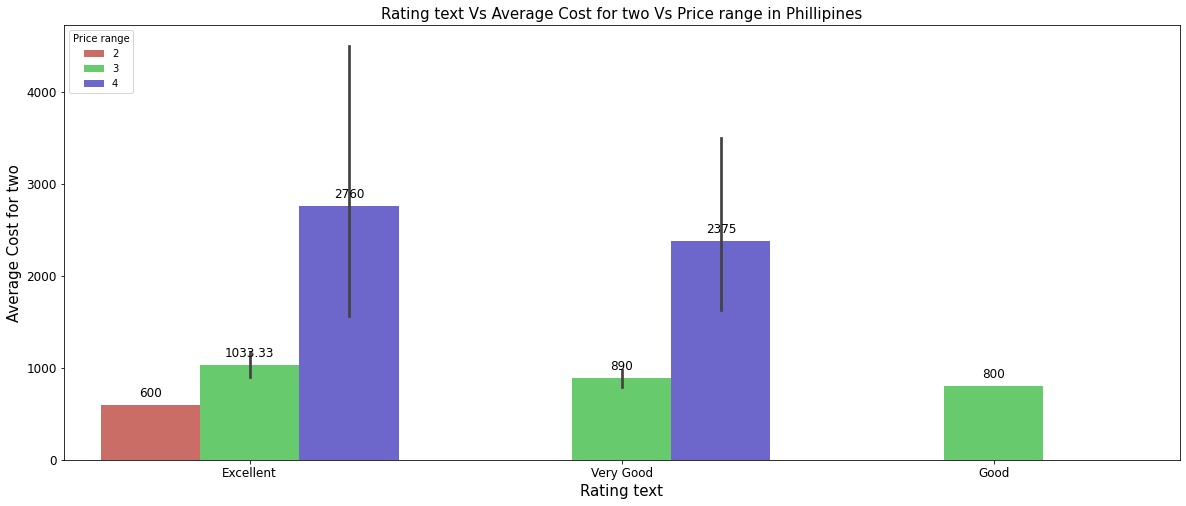

In [718]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Phillipines by barplot


filter = zomato[zomato['Country']=='Phillipines']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='hls')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Phillipines',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

### Observations

In Phillipines, Price Range is classified into 2,3 and 4

To get an excellent food at an average cost(P) for two as follows

Price Range 2 - 600 (Rating -Excellent)

Price Range 3 - 1033.33 (Rating - Excellent)

Price Range 4 - 2760 ((Rating - Excellent)

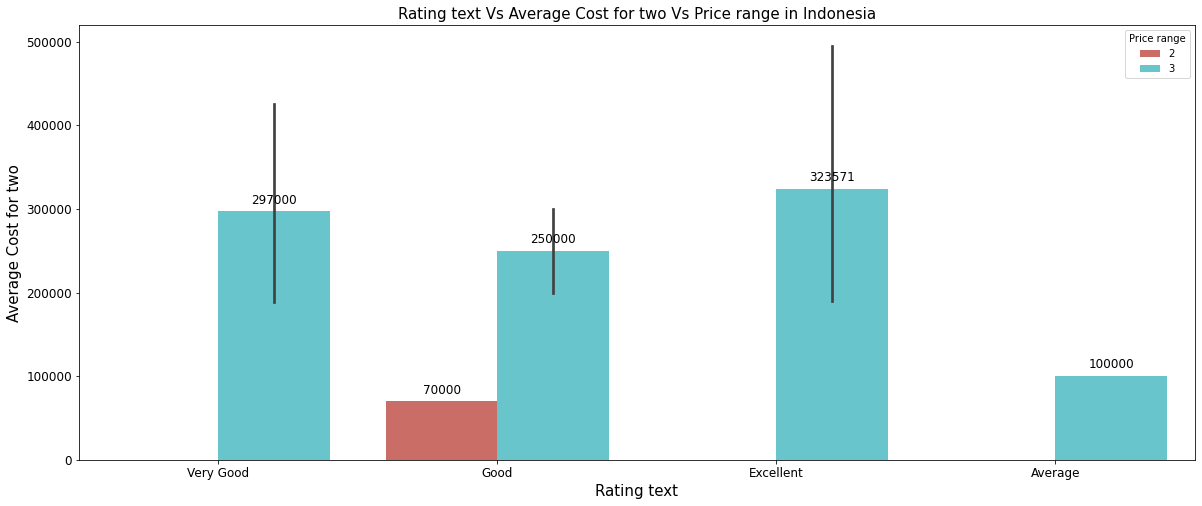

In [719]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Indonesia by barplot


filter = zomato[zomato['Country']=='Indonesia']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='hls')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Indonesia',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

### Observations

In Indonesia, Price Range is classified into 2 and 3

To get an excellent food at an average cost(Indonesian Rupiah) for two as follows

Price Range 2 - 70000 (Rating - Good)

Price Range 3 - 323571 (Rating - Excellent)

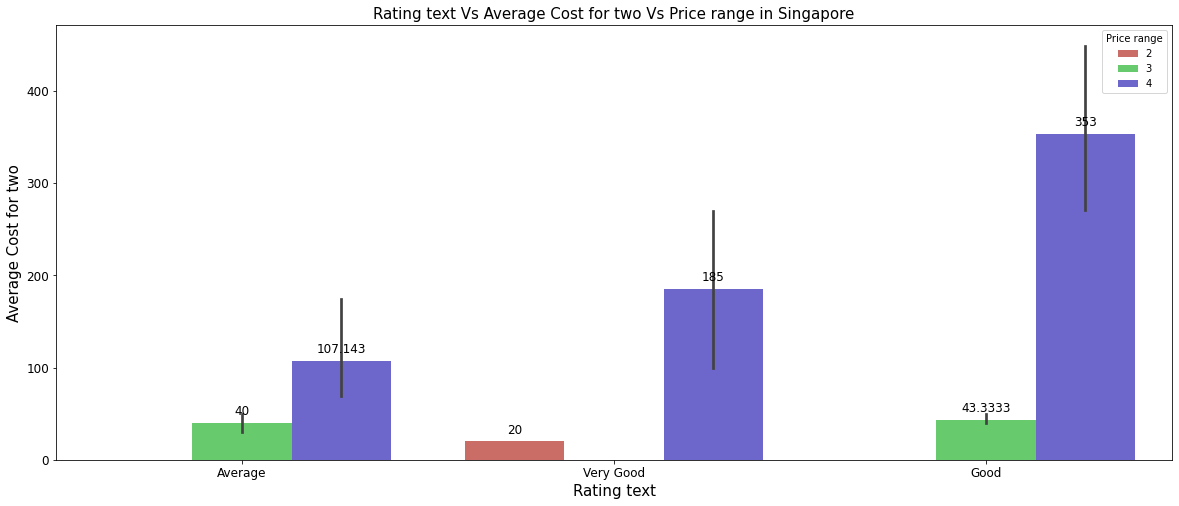

In [720]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Singapore by barplot


filter = zomato[zomato['Country']=='Singapore']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='hls')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Singapore',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

### Observations

In Singapore, Price Range is classified into 2, 3 and 4

Restaurants rating are mostly Average, Good and Very Good, there are no data for restaurants which are Poor and Excellent

Price Range for an average cost(Dollar) for two as follows

Price Range 2 - 20 (Rating - Very Good)

Price Range 3 - 43.33 (Rating - Good)

Price Range 4 - 185 (Rating - Very Good)

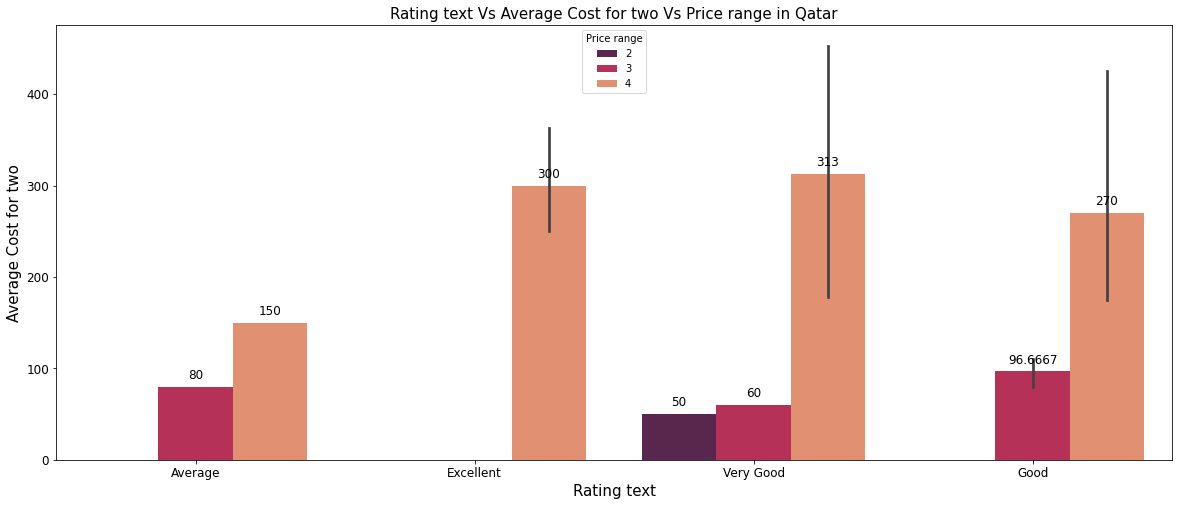

In [721]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Qatar by barplot


filter = zomato[zomato['Country']=='Qatar']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='rocket')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Qatar',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

### Observations

In Qatar, Price Range is classified into 2,3 and 4

To get an excellent food at an average cost(Qatari Rial) for two as follows

Price Range 2 - 50 (Rating - Very Good)

Price Range 3 - 60 (Rating - Very Good)

Price Range 4 - 300 ((Rating - Excellent)

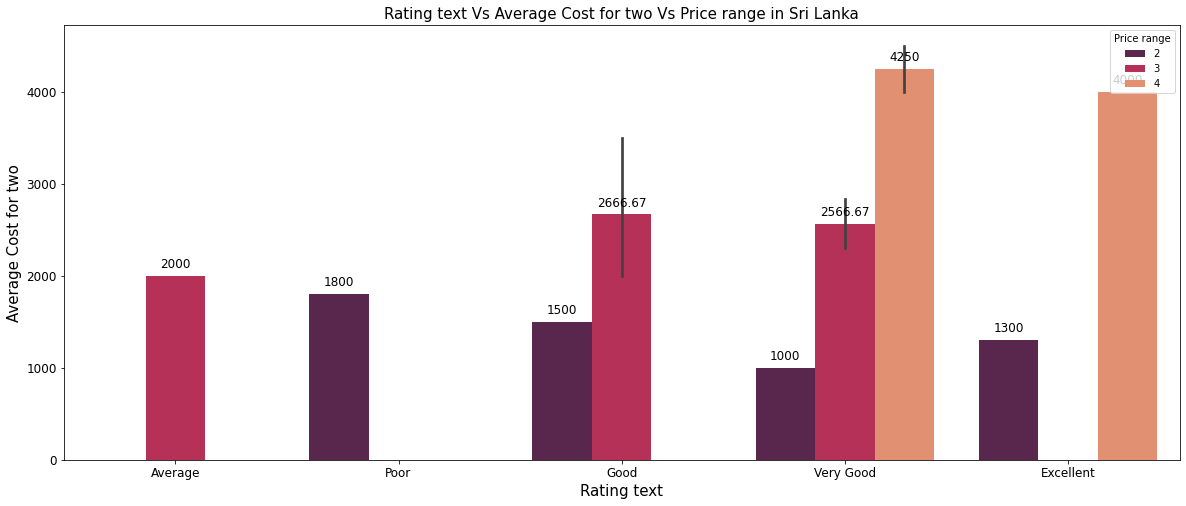

In [722]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Sri Lanka by barplot


filter = zomato[zomato['Country']=='Sri Lanka']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='rocket')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Sri Lanka',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

### Observations

In Sri Lanka, Price Range is classified into 2,3 and 4

To get an excellent food at an average cost(Sri Lankan Rupee) for two as follows

Price Range 2 - 1300 (Rating - Excellent)

Price Range 3 - 2566.67 (Rating - Very Good)

Price Range 4 - 4000 ((Rating - Excellent)

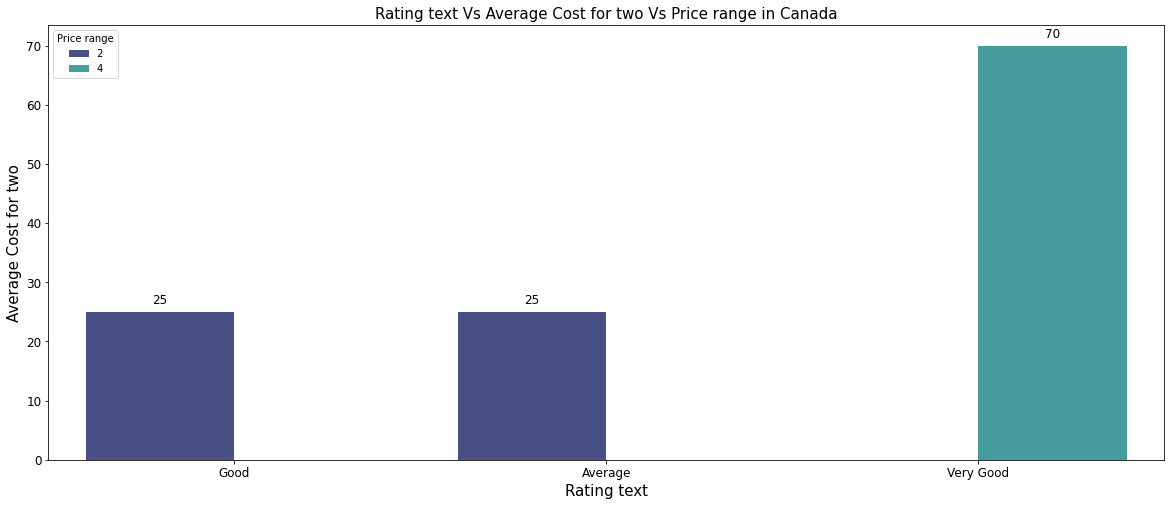

In [723]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Canada by barplot


filter = zomato[zomato['Country']=='Canada']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='mako')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Canada',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

### Observations

In Canada, Price Range is classified into 2 and 4

Restaurants rating are mostly Average, Good and Very Good, there are no data for restaurants which are Poor and Excellent

Price Range for an average cost(Dollar) for two as follows

Price Range 2 - 25 (Rating - Good)

Price Range 4 - 70 ((Rating - Very Good)

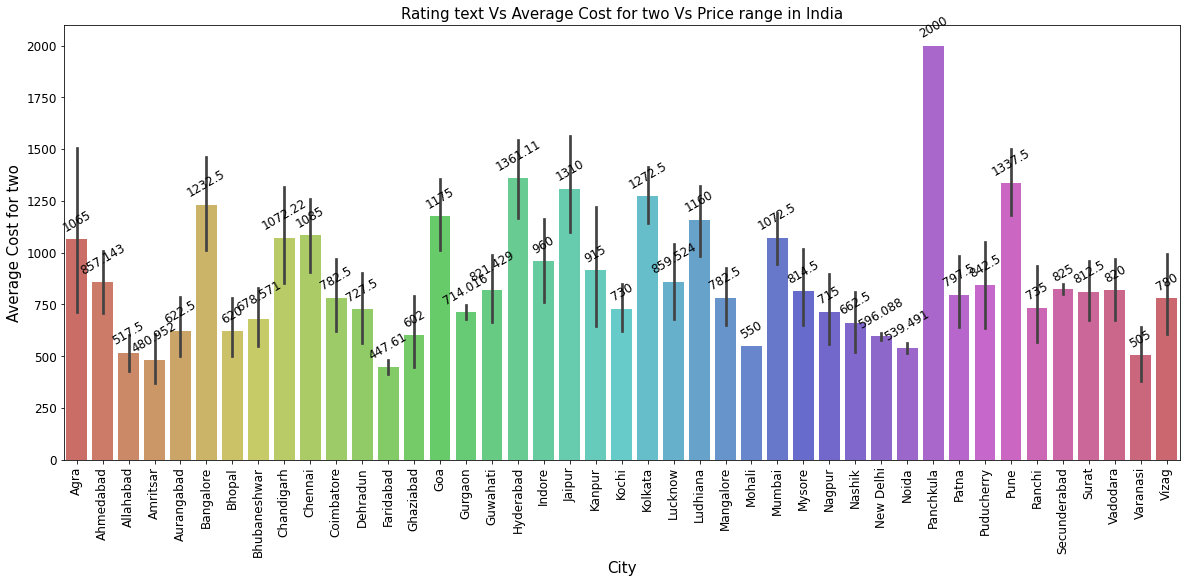

In [724]:
# Visualizing Average Cost for two Vs City in India by barplot


filter = zomato[zomato['Country']=='India']
plt.figure(figsize=(20,8))
cat=sns.barplot(data=filter, x='City',y='Average Cost for two',palette='hls')
plt.xlabel("City",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in India',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5,rotation=30)
plt.show()

### Observations

94% data are from India, hence Comparing City vs Average Cost for Two in India

Based on above barplot, we can observe Panchkula got the highest Average cost with 2000, followed by Hyderabad 1361 and Pune
with 1337

City with lowest average cost is Faridabad with 447 and Amritsar with 480

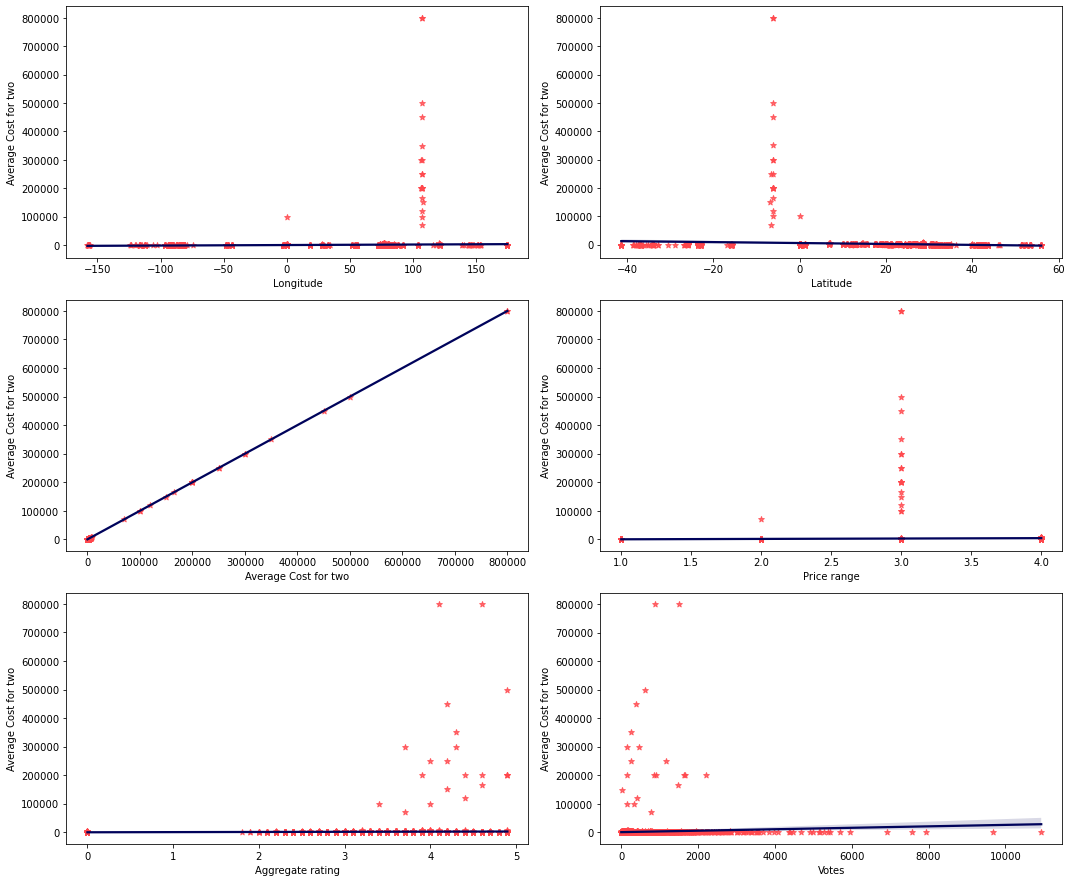

In [725]:
# Visualizing the dataset with regplot with target variable ''Average Cost for two'

plt.figure(figsize=(15,16))
plot_number=1
for i in zomato_num:
    if plot_number <=6:
        ax=plt.subplot(3,2,plot_number)
        sns.regplot(x=zomato[i],y=zomato['Average Cost for two'],scatter_kws={"color": "#ff474c"}, 
                    line_kws={"color": "#00035b"},marker='*')
        plt.xlabel(i,fontsize=10)
    plot_number+=1
plt.tight_layout()

### Observations

Above regplot shows that there is no significant linear relationship between features and target variable 'Average Cost for two'

# Data Feature Selection and Engineering

## Label Encoding

In [726]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in zomato.columns:
    if (zomato[i].dtypes == 'object'):
        zomato[i] = le.fit_transform(zomato[i].values.reshape(-1,1))
zomato.head(5)

Restaurant Name  City  Locality Verbose   Longitude   Latitude  Cuisines  \
0             3742    73               172  121.027535  14.565443       920   
1             3167    73               600  121.014101  14.553708      1111   
2             2892    75               314  121.056831  14.581404      1671   
3             4700    75               873  121.056475  14.585318      1126   
4             5515    75               873  121.057508  14.584450      1122   

   Average Cost for two  Currency  Has Table booking  Has Online delivery  \
0                  1100         0                  1                    0   
1                  1200         0                  1                    0   
2                  4000         0                  1                    0   
3                  1500         0                  0                    0   
4                  1500         0                  1                    0   

   Is delivering now  Price range  Aggregate rating  Rating text  Votes  \
0                  0            3               4.8            1    314   
1                  0            3               4.5            1    591   
2                  0            4               4.4            5    270   
3                  0            4               4.9            1    365   
4                  0            4               4.8            1    229   

   Country  
0        6  
1        6  
2        6  
3        6  
4        6

### Observations

Encoded the categorical fetures to Numerical by Label Encoder

## Describe - Statistical Summary

In [727]:
# Checking the statistical summary of the dataset

zomato.describe().T

count         mean           std         min  \
Restaurant Name       9542.0  3648.528715   2140.286854    0.000000   
City                  9542.0    77.570530     22.781307    0.000000   
Locality Verbose      9542.0   676.259904    330.752469    0.000000   
Longitude             9542.0    64.274997     41.197602 -157.948486   
Latitude              9542.0    25.848532     11.010094  -41.330428   
Cuisines              9542.0   989.163173    514.326600    0.000000   
Average Cost for two  9542.0  1200.326137  16128.743876    0.000000   
Currency              9542.0     3.979564      0.912652    0.000000   
Has Table booking     9542.0     0.121358      0.326560    0.000000   
Has Online delivery   9542.0     0.256864      0.436927    0.000000   
Is delivering now     9542.0     0.003563      0.059589    0.000000   
Price range           9542.0     1.804968      0.905563    1.000000   
Aggregate rating      9542.0     2.665238      1.516588    0.000000   
Rating text           9542.0     1.788933      1.694795    0.000000   
Votes                 9542.0   156.772060    430.203324    0.000000   
Country               9542.0     3.727101      2.634405    0.000000   

                              25%          50%          75%            max  
Restaurant Name       1775.250000  3590.000000  5478.750000    7436.000000  
City                    78.250000    87.000000    87.000000     139.000000  
Locality Verbose       387.000000   705.000000   951.000000    1262.000000  
Longitude               77.081565    77.192031    77.282043     174.832089  
Latitude                28.478658    28.570444    28.642711      55.976980  
Cuisines               497.000000  1126.000000  1354.000000    1824.000000  
Average Cost for two   250.000000   400.000000   700.000000  800000.000000  
Currency                 4.000000     4.000000     4.000000      11.000000  
Has Table booking        0.000000     0.000000     0.000000       1.000000  
Has Online delivery      0.000000     0.000000     1.000000       1.000000  
Is delivering now        0.000000     0.000000     0.000000       1.000000  
Price range              1.000000     2.000000     2.000000       4.000000  
Aggregate rating         2.500000     3.200000     3.700000       4.900000  
Rating text              0.000000     2.000000     3.000000       5.000000  
Votes                    5.000000    31.000000   130.000000   10934.000000  
Country                  3.000000     3.000000     3.000000      14.000000

### Observations

Count is same across all the features

Outliers are present in the features Longitude, Latitude, Average Cost for two and Votes as the difference between 75% to max is high

Mean is greater than Median(50%) in Average Cost for two and Votes, which shows data is skewed towards right

Features Longitude, Latitude and Aggregate rating are skewed towards left, Mean is less than Median

## Correlation Analysis

<AxesSubplot:>

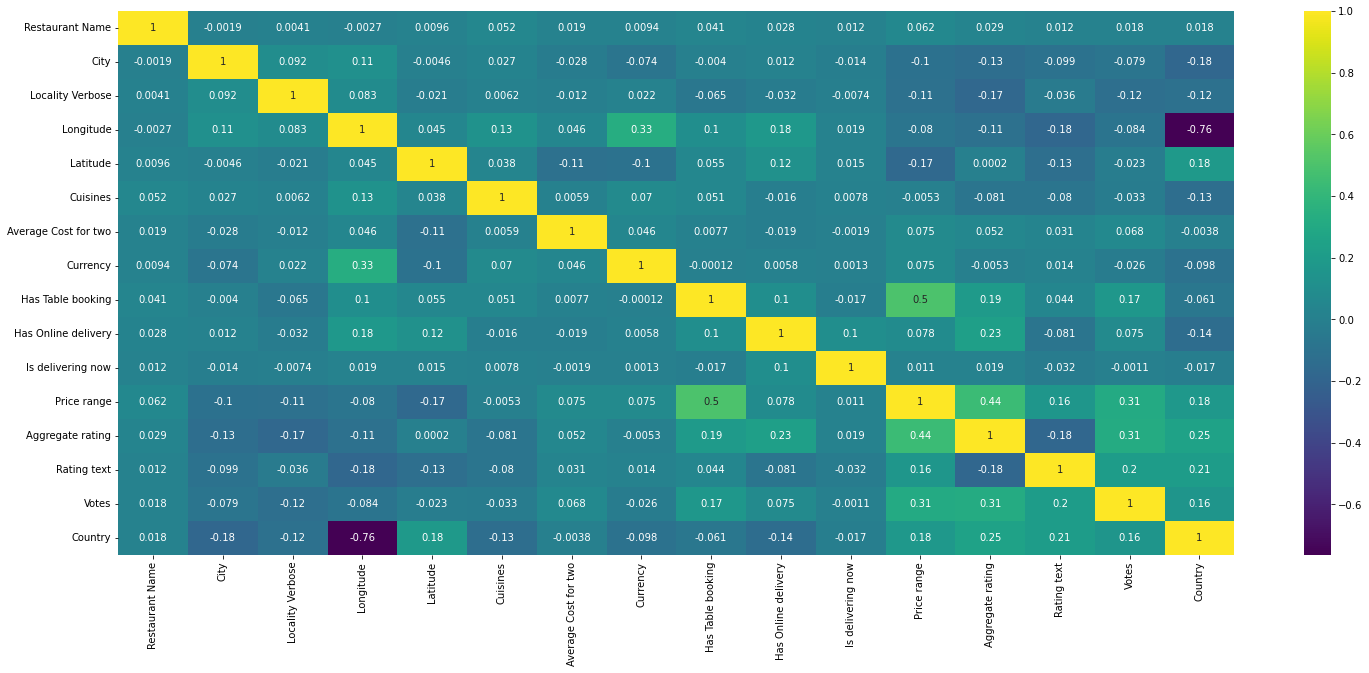

In [728]:
# Visualizing correlation of the dataset in heatmap

plt.figure(figsize=(25,10))
sns.heatmap(zomato.corr(),annot=True,cmap='viridis')

<function matplotlib.pyplot.show(close=None, block=None)>

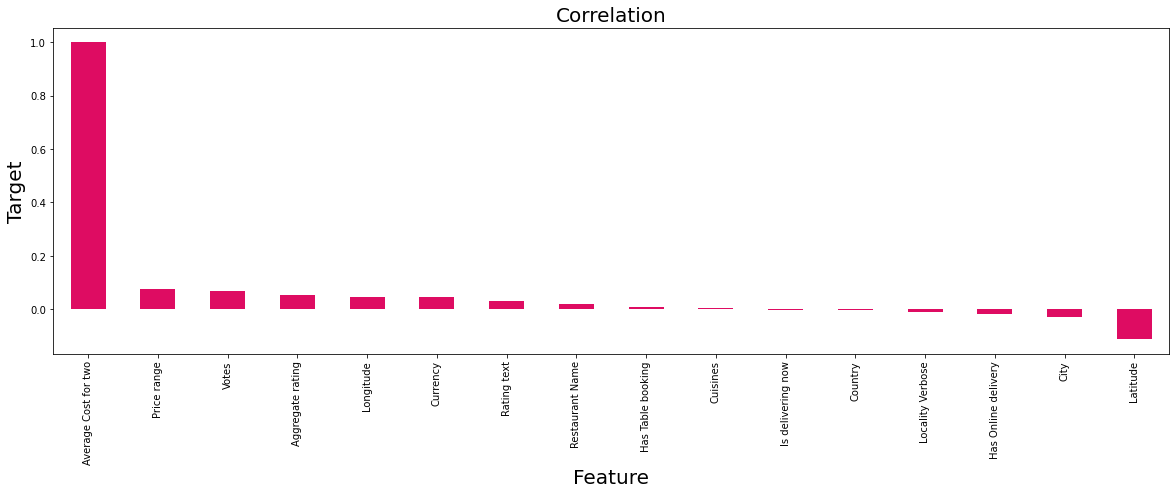

In [729]:
# Visualizing the correlation of the features with target variable 'Average Cost for two'

plt.figure(figsize=(20,6))
zomato.corr()['Average Cost for two'].sort_values(ascending=False).plot(kind='bar',color='#de0c62')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

In [730]:
zomato.corr()['Average Cost for two'].sort_values()

Latitude               -0.111080
City                   -0.028306
Has Online delivery    -0.019017
Locality Verbose       -0.011882
Country                -0.003793
Is delivering now      -0.001866
Cuisines                0.005875
Has Table booking       0.007733
Restaurant Name         0.019230
Rating text             0.031440
Currency                0.045566
Longitude               0.045948
Aggregate rating        0.051864
Votes                   0.067833
Price range             0.075111
Average Cost for two    1.000000
Name: Average Cost for two, dtype: float64

### Observations

Features Latitude, City, Has Online delivery, Locality Verbose, Country and Is delivering now are negatively correlated with target 
variable Average Cost for two

Cuisines, Has Table booking, Restaurant Name, Rating text, Currency, Longitude, Aggregate rating, Votes and Price range
are positively correlated with target variable

Moreover longitude and Country are highly negatively correlated

## Outliers Treatment with Zscore

In [731]:
from scipy.stats import zscore

col =['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

z1=zomato[col]
z1.head(5)

Longitude   Latitude  Average Cost for two  Price range  Aggregate rating  \
0  121.027535  14.565443                  1100            3               4.8   
1  121.014101  14.553708                  1200            3               4.5   
2  121.056831  14.581404                  4000            4               4.4   
3  121.056475  14.585318                  1500            4               4.9   
4  121.057508  14.584450                  1500            4               4.8   

   Votes  
0    314  
1    591  
2    270  
3    365  
4    229

In [732]:
z = np.abs(zscore(z1))
threshold=3
print(np.where(z>3))

(array([  22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,   99,  100,  101,  102,  103,  104,  105,  106,  107,  108,
        109,  110,  111,  112,  113,  114,  115,  116,  117,  118,  119,
        120,  121,  122,  123,  124,  125,  126,  127,  128,  129,  130,
        131,  132,  133,  134,  135,  136,  137,  138,  139,  140,  141,
        142,  143,  144,  145,  146,  147,  148,  149,  150,  151,  152,
        153,  154,  155,  156,  157,  158,  159,  160,  161,  162,  163,
        164,  165,  166,  167,  168,  169,  170,  

In [733]:
zomato_new = zomato[(z<3).all(axis=1)]

In [734]:
zomato.shape

(9542, 16)

In [735]:
zomato_new.shape

(8756, 16)

In [736]:
# Data Loss

data_loss =  (9542-8756)/9542*100
data_loss

8.237266820373087

### Observations

After applying Zscore method, data loss is 8.23% which is in acceptable range

## Skewness

In [737]:
# Checking skewness

zomato_new.skew()

Restaurant Name          0.042645
City                    -1.505859
Locality Verbose        -0.230696
Longitude               -3.179687
Latitude                -2.246169
Cuisines                -0.343326
Average Cost for two     3.667387
Currency                 6.610471
Has Table booking        2.268965
Has Online delivery      1.016921
Is delivering now       15.956834
Price range              0.987956
Aggregate rating        -0.887535
Rating text              0.438078
Votes                    3.555810
Country                  6.224507
dtype: float64

In [738]:
# Applying sqrt transformation method to the feature Average Cost for two

zomato_new['Average Cost for two']= np.sqrt(zomato_new['Average Cost for two'])

In [739]:
# Removing skewness using power transform 

from sklearn.preprocessing import PowerTransformer 

skew =['Longitude','Price range','Aggregate rating','Votes','Latitude']


pt = PowerTransformer(method='yeo-johnson',standardize=False)
zomato_new[skew] = pt.fit_transform(zomato_new[skew].values)

In [741]:
# Checking skewness

zomato_new.skew()

Restaurant Name          0.042645
City                    -1.505859
Locality Verbose        -0.230696
Longitude               -0.963749
Latitude                 0.409584
Cuisines                -0.343326
Average Cost for two     1.546098
Currency                 6.610471
Has Table booking        2.268965
Has Online delivery      1.016921
Is delivering now       15.956834
Price range              0.222590
Aggregate rating        -0.620066
Rating text              0.438078
Votes                   -0.012360
Country                  6.224507
dtype: float64

In [742]:
# Dropping the feature Is delivering now

zomato_new.drop(['Is delivering now'],axis=1,inplace=True)

In [743]:
# Checking skewness

zomato_new.skew()

Restaurant Name         0.042645
City                   -1.505859
Locality Verbose       -0.230696
Longitude              -0.963749
Latitude                0.409584
Cuisines               -0.343326
Average Cost for two    1.546098
Currency                6.610471
Has Table booking       2.268965
Has Online delivery     1.016921
Price range             0.222590
Aggregate rating       -0.620066
Rating text             0.438078
Votes                  -0.012360
Country                 6.224507
dtype: float64

### Observations

Skewness was high in features 'Longitude','Price range','Aggregate rating','Votes','Latitude'

Applied PowerTransformer(method='yeo-johnson') to the above feature and skewness reduced reasonably well

Further applying transformation method sqrt, cbrt, log to the feature 'Longitude' and 'Aggregate rating' is reducing
the value to NaN

For 'Average Cost for two' as it is the target variable, tried not to apply transformation methods but the performance of the
Model is very poor, hence applied 'sqrt' to reduce skewness and performance improved

Kept the threshold to +/- 0.9 to numerical features, except for target variable

Dropped the feature 'Is delivering now' as the skewness is high, even though it is an encoded feature performance of the model had no changes in dropping 
the column 



## Variance Inflation Factor

In [744]:
# Checking Variance inflation factor for the dataset 

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = zomato_new.drop('Average Cost for two',axis=1)
x.head(5)

Restaurant Name  City  Locality Verbose     Longitude   Latitude  Cuisines  \
0             3742    73               172  22790.560649  65.548565       920   
1             3167    73               600  22784.895234  65.462552      1111   
2             2892    75               314  22802.918144  65.665629      1671   
3             4700    75               873  22802.767955  65.694349      1126   
4             5515    75               873  22803.203757  65.687979      1122   

   Currency  Has Table booking  Has Online delivery  Price range  \
0         0                  1                    0     0.606284   
1         0                  1                    0     0.606284   
2         0                  1                    0     0.633050   
3         0                  0                    0     0.633050   
4         0                  1                    0     0.633050   

   Aggregate rating  Rating text     Votes  Country  
0         11.047522            1  6.095866        6  
1         10.044624            1  6.808049        6  
2          9.718611            5  5.927358        6  
3         11.390032            1  6.264439        6  
4         11.047522            1  5.744210        6

In [745]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor             Features
0     3.915913      Restaurant Name
1    14.322764                 City
2     5.494956     Locality Verbose
3    16.731728            Longitude
4    16.426336             Latitude
5     5.054089             Cuisines
6    48.035921             Currency
7     1.486114    Has Table booking
8     1.657013  Has Online delivery
9    60.797062          Price range
10   15.953374     Aggregate rating
11    2.484698          Rating text
12   16.696241                Votes
13   12.210270              Country


In [746]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m = ['Price range','Aggregate rating','Votes','Longitude','Latitude']

st= StandardScaler()
x[m] = st.fit_transform(x[m].values)
x.sample(5)

Restaurant Name  City  Locality Verbose  Longitude  Latitude  Cuisines  \
776              1517    17               784   1.159950 -1.124038       550   
5857             1484    87               719   0.220406  0.225337       859   
8317             2096    88               916   0.243504  0.192950      1626   
4260             1317    87               488   0.230159  0.205447      1306   
2844              973    87               178   0.227963  0.218665      1453   

      Currency  Has Table booking  Has Online delivery  Price range  \
776          4                  0                    0    -0.977182   
5857         4                  0                    1     0.653168   
8317         4                  0                    0     0.653168   
4260         4                  0                    0    -0.977182   
2844         4                  0                    0    -0.977182   

      Aggregate rating  Rating text     Votes  Country  
776           0.810173            2  1.423007        3  
5857          0.534073            0  0.317403        3  
8317         -0.216173            0  0.093357        3  
4260         -1.608562            3 -1.042648        3  
2844          0.357111            0  0.279498        3

In [747]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor             Features
0     3.860364      Restaurant Name
1    13.074083                 City
2     5.363863     Locality Verbose
3     1.427271            Longitude
4     1.451929             Latitude
5     4.934982             Cuisines
6    29.329391             Currency
7     1.547823    Has Table booking
8     1.610581  Has Online delivery
9     1.780001          Price range
10    4.460081     Aggregate rating
11    2.482706          Rating text
12    4.879090                Votes
13   11.968752              Country


In [748]:
# Dropping the feature Currency

x.drop(['Currency'],axis=1,inplace=True)

In [749]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor             Features
0     3.751689      Restaurant Name
1     9.653630                 City
2     4.932354     Locality Verbose
3     1.397011            Longitude
4     1.446768             Latitude
5     4.566543             Cuisines
6     1.547809    Has Table booking
7     1.599262  Has Online delivery
8     1.776296          Price range
9     4.438902     Aggregate rating
10    2.425255          Rating text
11    4.876809                Votes
12    8.178787              Country


### Observations

VIF is high in the features 'Price range','Aggregate rating','Votes','Longitude','Latitude

Applied Standard Scaler method to standardize the feature and Dropped the feature Currency to reduce VIF across all the features

## Regression Model Evaluation -- Prediction: Average Cost for two

In [750]:
# Checking the dimension of the dataset

x.shape

(8756, 13)

In [751]:
# Splitting the target variable for train, test

y = zomato_new['Average Cost for two']
y.shape

(8756,)

In [752]:
# Importing required Libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

## Finding Random State

In [753]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    acc = r2_score(y_test,predrf)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max r2 score is ", maxAcc*100, "on Random state", maxRS)

Max r2 score is  90.70776272015034 on Random state 182


## Train and Test Split

In [754]:
# Training the Model with .30 as test size and random state at 182

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=182)

In [755]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## Lasso

In [756]:
ls = Lasso()

ls.fit(x_train,y_train)
ls.score(x_train,y_train)
print(ls.score(x_train,y_train)*100)
ls_predict=ls.predict(x_test)
cr1 = cross_val_score(ls,x,y, cv=5)

print('MSE:',mean_squared_error(ls_predict,y_test))
print('MAE:',mean_absolute_error(ls_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ls_predict)))
print('r2_score:',r2_score(ls_predict,y_test)*100)
print('CV score of Lasso Regression:',cr1.mean()*100)

64.20467352176951
MSE: 30.602661680390174
MAE: 3.813346457370397
RMSE: 5.531967252288301
r2_score: 25.94790444006472
CV score of Lasso Regression: 61.63556847616467


## Ridge

In [757]:
rd = Ridge()

rd.fit(x_train,y_train)
rd.score(x_train,y_train)
print(rd.score(x_train,y_train)*100)
rd_predict=rd.predict(x_test)
cr2 = cross_val_score(rd,x,y, cv=5)

print('MSE:',mean_squared_error(rd_predict,y_test))
print('MAE:',mean_absolute_error(rd_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, rd_predict)))
print('r2_score:',r2_score(rd_predict,y_test)*100)
print('CV score of Ridge Regression:',cr2.mean()*100)

72.64663235621909
MSE: 21.66008174452149
MAE: 3.3032431099538164
RMSE: 4.654039293401109
r2_score: 67.11666727779478
CV score of Ridge Regression: 68.32471372480697


## LinearRegression

In [758]:
LR=LinearRegression(copy_X='bool',fit_intercept='bool',n_jobs=2,positive='bool')

LR.fit(x_train,y_train)
LR.score(x_train,y_train)
print(LR.score(x_train,y_train)*100)
LR_predict=LR.predict(x_test)
cr3 = cross_val_score(LR,x,y, cv=5)

print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, LR_predict)))
print('r2_score:',r2_score(LR_predict,y_test)*100)
print('CV score of Linear Regression:',cr3.mean()*100)

65.05965310258459
MSE: 31.784941460169797
MAE: 3.7028653555285693
RMSE: 5.637813535420429
r2_score: 46.9974027671654
CV score of Linear Regression: 53.437171368888144


## RandomForestRegressor

In [759]:
RFR = RandomForestRegressor()

RFR.fit(x_train,y_train)
RFR.score(x_train,y_train)
print(RFR.score(x_train,y_train)*100)
RFR_predict=RFR.predict(x_test)
cr4 = cross_val_score(LR,x,y, cv=5)

print('MSE:',mean_squared_error(RFR_predict,y_test))
print('MAE:',mean_absolute_error(RFR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, RFR_predict)))
print('r2_score:',r2_score(RFR_predict,y_test)*100)
print('CV score of Random Forest Regressor:',cr4.mean()*100)

98.43943459858833
MSE: 8.290852180660943
MAE: 2.1193671088967414
RMSE: 2.879383993263306
r2_score: 90.20749783781841
CV score of Random Forest Regressor: 53.437171368888144


## ExtraTreesRegressor

In [760]:
ET = ExtraTreesRegressor()
ET.fit(x_train,y_train)
print(ET.score(x_train,y_train)*100)
ET_predict = ET.predict(x_test)
cr5 = cross_val_score(ET,x,y,cv=5)

print('MSE:',mean_squared_error(ET_predict,y_test))
print('MAE:',mean_absolute_error(ET_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ET_predict)))
print('r2_score:',r2_score(ET_predict,y_test)*100)
print('CV score of Extra Trees Regressor:',cr5.mean()*100)

100.0
MSE: 8.839688561286655
MAE: 2.182410641309375
RMSE: 2.973161374915034
r2_score: 89.4878537901979
CV score of Extra Trees Regressor: 78.94927085837729


## DecisionTreeRegressor

In [761]:
DT = DecisionTreeRegressor()

DT.fit(x_train,y_train)
DT.score(x_train,y_train)
print(DT.score(x_train,y_train)*100)
DT_predict=DT.predict(x_test)
cr6 = cross_val_score(DT,x,y, cv=5)

print('MSE:',mean_squared_error(DT_predict,y_test))
print('MAE:',mean_absolute_error(DT_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, DT_predict)))
print('r2_score:',r2_score(DT_predict,y_test)*100)
print('CV score of DecisionTree Regressor:',cr6.mean()*100)

100.0
MSE: 15.725454745460198
MAE: 2.7267327328404685
RMSE: 3.9655333494323557
r2_score: 82.92436448398135
CV score of DecisionTree Regressor: 52.43772866468236


## KNeighborsRegressor

In [762]:
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train)
print(KNN.score(x_train,y_train)*100)
KNN_predict = KNN.predict(x_test)
cr7 = cross_val_score(KNN,x,y,cv=5)

print('MSE:',mean_squared_error(KNN_predict,y_test))
print('MAE:',mean_absolute_error(KNN_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, KNN_predict)))
print('r2_score:',r2_score(KNN_predict,y_test)*100)
print('CV score of K Neighbors Regressor:',cr7.mean()*100)

35.15693168975407
MSE: 87.24402736333765
MAE: 6.493253707209117
RMSE: 9.340451132752511
r2_score: -225.19173358628365
CV score of K Neighbors Regressor: -9.852361469605556


## GradientBoostingRegressor

In [763]:
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
print(GB.score(x_train,y_train)*100)
GB_predict = GB.predict(x_test)
cr8 = cross_val_score(GB,x,y,cv=5)

print('MSE:',mean_squared_error(GB_predict,y_test))
print('MAE:',mean_absolute_error(GB_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, GB_predict)))
print('r2_score:',r2_score(GB_predict,y_test)*100)
print('CV score of Gradient Boosting Regressor:',cr8.mean()*100)

90.2387357987577
MSE: 9.172968633199032
MAE: 2.3059049336345536
RMSE: 3.0286909108060254
r2_score: 88.39774715769016
CV score of Gradient Boosting Regressor: 72.54767897612624


## BaggingRegressor

In [764]:
BR = BaggingRegressor()
BR.fit(x_train,y_train)
print(BR.score(x_train,y_train)*100)
BR_predict = BR.predict(x_test)
cr9 = cross_val_score(BR,x,y,cv=5)

print('MSE:',mean_squared_error(BR_predict,y_test))
print('MAE:',mean_absolute_error(BR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, BR_predict)))
print('r2_score:',r2_score(BR_predict,y_test)*100)
print('CV score of Bagging Regressor:',cr9.mean()*100)

97.82917714245907
MSE: 8.6287572058782
MAE: 2.1965145065841396
RMSE: 2.9374746306782296
r2_score: 89.90496981677082
CV score of Bagging Regressor: 77.00131894235379


## AdaBoostRegressor

In [765]:
ABR = AdaBoostRegressor()
ABR.fit(x_train,y_train)
print(ABR.score(x_train,y_train)*100)
ABR_predict = ABR.predict(x_test)
cr10 = cross_val_score(ABR,x,y,cv=5)

print('MSE:',mean_squared_error(ABR_predict,y_test))
print('MAE:',mean_absolute_error(ABR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ABR_predict)))
print('r2_score:',r2_score(ABR_predict,y_test)*100)
print('CV score of Ada Boost Regressor:',cr10.mean()*100)

85.10710733289936
MSE: 13.549040488974233
MAE: 2.8632486599405027
RMSE: 3.6809021297739273
r2_score: 83.60590547089177
CV score of Ada Boost Regressor: 68.6309584745034


## SVR

In [766]:
SV = SVR()

SV.fit(x_train,y_train)
print(SV.score(x_train,y_train)*100)
SV_predict = SV.predict(x_test)
cr11 = cross_val_score(SV,x,y,cv=5)

print('MSE:',mean_squared_error(SV_predict,y_test))
print('MAE:',mean_absolute_error(SV_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, SV_predict)))
print('r2_score:',r2_score(SV_predict,y_test)*100)
print('CV score of SVR:',cr11.mean()*100)

-1.45669354839002
MSE: 90.23152322513518
MAE: 6.566860348812663
RMSE: 9.499027488387176
r2_score: -13744.196086203505
CV score of SVR: -3.7917142532993426


## Hyper Parameter Tuning

### Hyper Parameter Tuning for ExtraTreesRegressor

In [767]:
# Hyper Parameter Tuning for ExtraTreesRegressor

grid_params={'n_estimators':[100,150,200],'criterion':['squared_error','friedman_mse'],
             'min_samples_split':[2,4,5,6],'min_samples_leaf':[1,2],'max_depth':[50,100,120,150]}
            
             
        
gs = GridSearchCV(ExtraTreesRegressor(),param_grid=grid_params)

g_res = gs.fit(x_train,y_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [50, 100, 120, 150],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [100, 150, 200]})
Best Score 0.8853667145122499
Best Params {'criterion': 'friedman_mse', 'max_depth': 150, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150}


In [780]:
# Tuning ExtraTreesRegressor with parameters

Final_Model1 = ExtraTreesRegressor(n_estimators =150, criterion = 'friedman_mse',min_samples_split=6,max_depth=150,
                                  min_samples_leaf=1)
                                       
Final_Model1.fit(x_train,y_train)
pred1 = Final_Model1.predict(x_test)
scores = r2_score(y_test,pred1)
cr_v1 = cross_val_score(Final_Model1,x,y,cv=5)

print('MSE:',mean_squared_error(pred1,y_test))
print('MAE:',mean_absolute_error(pred1,y_test))
print("RMSE:",np.sqrt(mean_squared_error(pred1,y_test)))
print('r2_score:',r2_score(pred1,y_test)*100)
print('CV score of Extra Trees Regressor:',cr_v1.mean()*100)

MSE: 8.637282163607589
MAE: 2.1749942693473456
RMSE: 2.9389253416185293
r2_score: 89.61834366730204
CV score of Extra Trees Regressor: 79.17062734235711


### Hyper Parameter Tuning for BaggingRegressor

In [772]:
# Hyper Parameter Tuning for BaggingRegressor

grid_params={"n_estimators": [100,150,200],'max_features': [0.5, 0.7, 1.0,1.5],
              'max_samples': [0.5, 0.7, 1.0,1.5],'bootstrap':['bool','True']}
            
            
gs = GridSearchCV(BaggingRegressor(),param_grid=grid_params)

g_res = gs.fit(x_train,y_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=BaggingRegressor(),
             param_grid={'bootstrap': ['bool', 'True'],
                         'max_features': [0.5, 0.7, 1.0, 1.5],
                         'max_samples': [0.5, 0.7, 1.0, 1.5],
                         'n_estimators': [100, 150, 200]})
Best Score 0.8867431977406373
Best Params {'bootstrap': 'True', 'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 200}


In [784]:
# Tuning BaggingRegressor with parameters

Final_Model2 = BaggingRegressor(n_estimators =200, bootstrap = True,max_features=1.0,max_samples=0.7)                                                                    

Final_Model2.fit(x_train,y_train)
pred2 = Final_Model2.predict(x_test)
scores = r2_score(y_test,pred2)
cr_v2 = cross_val_score(Final_Model2,x,y,cv=5)

print('MSE:',mean_squared_error(pred2,y_test))
print('MAE:',mean_absolute_error(pred2,y_test))
print("RMSE:",np.sqrt(mean_squared_error(pred2,y_test)))
print('r2_score:',r2_score(pred2,y_test)*100)
print('CV score of BaggingRegressor:',cr_v2.mean()*100)

MSE: 8.24646306245555
MAE: 2.121075268060766
RMSE: 2.8716655554669925
r2_score: 90.33265450577332
CV score of BaggingRegressor: 76.79368578388579


### Hyper Parameter Tuning for Ridge

In [769]:
# Hyper Parameter Tuning for Ridge

grid_params={'alpha': [0.001,0.01, 0.1, 1, 10],'fit_intercept':['True','bool'],'max_iter':[1000,1500,2000,2500],
             'solver':['auto', 'svd', 'cholesky', 'lsq', 'sparse_cg', 'sag', 'saga', 'lbfgs'],}
            
            
gs = GridSearchCV(Ridge(),param_grid=grid_params)

g_res = gs.fit(x_train,y_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'fit_intercept': ['True', 'bool'],
                         'max_iter': [1000, 1500, 2000, 2500],
                         'solver': ['auto', 'svd', 'cholesky', 'lsq',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})
Best Score 0.7229136289364856
Best Params {'alpha': 1, 'fit_intercept': 'True', 'max_iter': 1000, 'solver': 'auto'}


In [770]:
# Tuning Ridge with parameters

Final_Model3 = Ridge(alpha=1,fit_intercept=True,max_iter=1000,solver='auto')
                                                                                                            
Final_Model3.fit(x_train,y_train)
pred3 = Final_Model3.predict(x_test)
scores = r2_score(y_test,pred3)
cr_v3 = cross_val_score(Final_Model3,x,y,cv=5)

print('MSE:',mean_squared_error(pred3,y_test))
print('MAE:',mean_absolute_error(pred3,y_test))
print("RMSE:",np.sqrt(mean_squared_error(pred3,y_test)))
print('r2_score:',r2_score(pred3,y_test)*100)
print('CV score of Ridge:',cr_v3.mean()*100)

MSE: 21.66008174452149
MAE: 3.3032431099538164
RMSE: 4.654039293401109
r2_score: 67.11666727779478
CV score of Ridge: 68.32471372480697


## Saving the Final model

In [781]:
# Saving the model using .pkl

import joblib

joblib.dump(Final_Model1,"Zomato_Restaurant_Reg.pkl")

['Zomato_Restaurant_Reg.pkl']

## Predicting the Model

In [782]:
# Loading the saved model

Model=joblib.load("Zomato_Restaurant_Reg.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([25.85111076, 24.27637262, 25.30047115, ..., 17.91983485,
       15.36966261, 33.36386989])

In [783]:
pd.set_option('display.max_rows',None)
pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

Predicted   Original
0     25.851111  22.360680
1     24.276373  22.360680
2     25.300471  24.494897
3     34.713890  33.166248
4     37.387169  40.000000
5     25.449307  28.284271
6     14.369816  17.320508
7     25.326696  26.457513
8     25.154362  22.360680
9     38.127058  35.355339
10    22.667081  22.360680
11    15.379281  14.142136
12    17.083181  20.000000
13    25.631442  24.494897
14    24.623975  24.494897
15    23.803642  25.495098
16    14.181095  20.000000
17    17.430334  14.142136
18    15.562041  14.142136
19    35.256524  43.588989
20    21.141302  21.213203
21    16.009772  12.247449
22    24.782708  24.494897
23    17.595459  12.247449
24    26.011645  26.457513
25    26.062394  22.360680
26    24.628754  22.360680
27    22.376331  22.360680
28    18.004592  10.000000
29    36.340679  34.641016
30    15.278651  20.000000
31    14.858518  10.000000
32    24.489308  25.495098
33    32.035195  31.622777
34    18.283758  14.142136
35    24.126135  22.360680
36    16.874948  15.811388
37    23.799699  27.386128
38    16.103272  17.320508
39    32.452542  33.166248
40    25.506032  22.360680
41    16.374919  14.142136
42    17.281700  17.320508
43    13.298854  12.247449
44    25.228513  24.494897
45    24.373246  24.494897
46    18.296848  18.708287
47    13.693391  18.708287
48    22.799323  22.360680
49    16.217737  15.811388
50    37.832422  35.355339
51    15.527973  10.000000
52    16.889322  21.213203
53    13.900021  14.142136
54    35.284076  38.729833
55    10.529881  10.000000
56    23.365302  23.452079
57    23.102220  22.360680
58    18.588715  21.213203
59     9.105086   8.944272
60     5.633328   4.472136
61    25.262209  24.494897
62    37.040756  31.622777
63    15.495669  15.811388
64    24.991814  22.360680
65    24.443163  23.452079
66    22.365692  22.360680
67    24.035678  24.494897
68    36.597629  37.416574
69    25.902446  24.494897
70    18.642588  17.320508
71    24.597289  24.494897
72    23.949007  24.494897
73    19.639850  20.000000
74    53.123726  50.000000
75    12.096074  18.708287
76    18.283299  18.708287
77    18.078714  17.320508
78    17.496023  15.811388
79    26.074262  28.284271
80    22.966678  22.360680
81    18.951743  20.000000
82    17.148915  17.320508
83    22.598472  24.494897
84    18.599962  18.708287
85     7.060089   7.071068
86    17.442674  17.320508
87    37.949753  42.426407
88    24.757511  24.494897
89    23.223894  22.360680
90    15.531096  20.000000
91    19.169674  20.000000
92    16.537165  14.142136
93    32.412699  31.622777
94    22.720351  22.360680
95    12.335181  10.000000
96    24.836075  24.494897
97    14.760928  14.142136
98    15.891484  17.320508
99    19.215264  20.000000
100   32.233148  33.166248
101   24.397372  22.360680
102   27.766994  28.284271
103   15.856867  14.142136
104   24.445867  22.360680
105   14.766759  15.811388
106   15.715031  14.142136
107   26.541392  30.000000
108   24.503266  22.360680
109   49.001965  44.721360
110   17.381556  20.000000
111   15.363578  17.320508
112   36.330764  34.641016
113   20.734634  21.213203
114   27.005970  26.457513
115   17.418839  17.320508
116   13.398614  14.142136
117   24.182183  22.360680
118   24.572505  24.494897
119   15.274764  17.320508
120   25.209421  24.494897
121    7.257010   7.416198
122   25.633426  24.494897
123   18.348338  18.708287
124   16.456825  15.811388
125   25.127200  26.457513
126   14.143994  14.142136
127   17.257887  15.811388
128   15.868484  10.000000
129   22.535564  22.360680
130   14.843874  12.247449
131   18.682542  18.708287
132   18.632002  18.708287
133   10.296113   7.745967
134   16.185806  17.320508
135   18.693074  20.000000
136   18.777685  15.811388
137    6.706744   7.071068
138   15.071762  14.142136
139   36.316027  38.729833
140   25.294102  22.360680
141   18.203763  21.213203
142   22.976159  24.494897
143   39.000230  38.729833
144   16.717052  12.247449
145   16.963194  15.811388
146   15.879218  15.811388
147   23.5

## Conclusion For Regression Model

When comparing with BaggingRegressor Vs Extra Trees Regressor

Extra Trees Regressor is constantly performing well and CV score is high, whereas Bagging Regressor perfomance
fluctuates in CV score

Concluding ExtraTreesRegressor as the best fit model for Regression based on r2_score 90% vs CV_Score 79% with 
MSE: 8.637282163607589, MAE: 2.1749942693473456 and RMSE: 2.9389253416185293

# Classification Model Evaluation - Price range

In [785]:
from scipy.stats import zscore

col =['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

z1=zomato[col]
z1.head(5)

Longitude   Latitude  Average Cost for two  Price range  Aggregate rating  \
0  121.027535  14.565443                  1100            3               4.8   
1  121.014101  14.553708                  1200            3               4.5   
2  121.056831  14.581404                  4000            4               4.4   
3  121.056475  14.585318                  1500            4               4.9   
4  121.057508  14.584450                  1500            4               4.8   

   Votes  
0    314  
1    591  
2    270  
3    365  
4    229

In [786]:
z = np.abs(zscore(z1))
threshold=3
print(np.where(z>3))

(array([  22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,   99,  100,  101,  102,  103,  104,  105,  106,  107,  108,
        109,  110,  111,  112,  113,  114,  115,  116,  117,  118,  119,
        120,  121,  122,  123,  124,  125,  126,  127,  128,  129,  130,
        131,  132,  133,  134,  135,  136,  137,  138,  139,  140,  141,
        142,  143,  144,  145,  146,  147,  148,  149,  150,  151,  152,
        153,  154,  155,  156,  157,  158,  159,  160,  161,  162,  163,
        164,  165,  166,  167,  168,  169,  170,  

In [787]:
zomato_new2 = zomato[(z<3).all(axis=1)]

In [788]:
zomato.shape

(9542, 16)

In [789]:
zomato_new2.shape

(8756, 16)

In [791]:
# Data Loss

data_loss = (9542-8756)/9542*100
data_loss

8.237266820373087

### Observations

After applying Zscore method, data loss is 8.23% which is in acceptable range

In [792]:
# Correlation check with target variable

zomato_new2.corr()['Price range'].sort_values()

City                   -0.137010
Locality Verbose       -0.114265
Latitude               -0.017057
Longitude              -0.012885
Cuisines                0.009651
Is delivering now       0.016481
Restaurant Name         0.066679
Currency                0.095212
Has Online delivery     0.114600
Rating text             0.120186
Country                 0.238584
Aggregate rating        0.420318
Votes                   0.424234
Has Table booking       0.555907
Average Cost for two    0.762662
Price range             1.000000
Name: Price range, dtype: float64

### Observations

Features City, Locality Verbose, Latitude, Longitude are negatively correlated with target variable 'Price range'

Features Cuisines, Is delivering now, Restaurant Name, Currency, Has Online delivery, Rating text, Country, Aggregate rating,
Votes, Has Table booking and Average Cost for two are positively correlated with the target variable

## Skewness

In [793]:
zomato_new2.skew()

Restaurant Name          0.042645
City                    -1.505859
Locality Verbose        -0.230696
Longitude               -3.179687
Latitude                -2.246169
Cuisines                -0.343326
Average Cost for two     3.667387
Currency                 6.610471
Has Table booking        2.268965
Has Online delivery      1.016921
Is delivering now       15.956834
Price range              0.987956
Aggregate rating        -0.887535
Rating text              0.438078
Votes                    3.555810
Country                  6.224507
dtype: float64

In [794]:
# Removing skewness using power transform

from sklearn.preprocessing import PowerTransformer 

skew2 =['Longitude','Latitude','Average Cost for two','Aggregate rating','Votes']

pt = PowerTransformer(method='yeo-johnson',standardize=False)
zomato_new2[skew2] = pt.fit_transform(zomato_new2[skew2].values)

In [795]:
zomato_new2.skew()

Restaurant Name          0.042645
City                    -1.505859
Locality Verbose        -0.230696
Longitude               -0.963749
Latitude                 0.409584
Cuisines                -0.343326
Average Cost for two     0.053731
Currency                 6.610471
Has Table booking        2.268965
Has Online delivery      1.016921
Is delivering now       15.956834
Price range              0.987956
Aggregate rating        -0.620066
Rating text              0.438078
Votes                   -0.012360
Country                  6.224507
dtype: float64

### Observations

Skewness was high in features 'Longitude','Latitude','Average Cost for two','Aggregate rating' and 'Votes

Applied PowerTransformer(method='yeo-johnson') to the above feature and skewness reduced reasonably well,
further applying transformation method is reducing the value to NaN, hence kept the threshold for numerical features to
+/- 0.9

## Variance inflation factor

In [796]:
# Checking Variance inflation factor for the dataset 
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

x2 = zomato_new2.drop("Price range",axis=1)
x2.sample(5)

Restaurant Name  City  Locality Verbose    Longitude    Latitude  \
5792             1582    87               710  8332.953739  200.195523   
2680             4954    87                58  8349.425496  199.472564   
3348             7396    87               291  8345.329124  199.598289   
6768             1508    87               866  8324.443371  199.335394   
5255             3075    87               665  8366.144032  199.947386   

      Cuisines  Average Cost for two  Currency  Has Table booking  \
5792       497              7.747915         4                  0   
2680      1102              9.592226         4                  0   
3348       554              8.487575         4                  0   
6768       625             12.872669         4                  0   
5255       246              9.185959         4                  0   

      Has Online delivery  Is delivering now  Aggregate rating  Rating text  \
5792                    0                  0          0.000000            3   
2680                    1                  0          6.139805            0   
3348                    0                  0          5.088734            0   
6768                    0                  0          5.344616            0   
5255                    1                  0          4.837503            0   

         Votes  Country  
5792  0.697965        3  
2680  4.111244        3  
3348  2.246121        3  
6768  1.635570        3  
5255  4.284249        3

In [797]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns
print(vif)

    VIF Factor              Features
0     3.909971       Restaurant Name
1    14.367539                  City
2     5.519537      Locality Verbose
3    17.302755             Longitude
4    16.761762              Latitude
5     4.998068              Cuisines
6    45.095016  Average Cost for two
7    49.526642              Currency
8     1.619647     Has Table booking
9     1.667444   Has Online delivery
10    1.017524     Is delivering now
11   15.949411      Aggregate rating
12    2.474004           Rating text
13   16.659356                 Votes
14   12.440766               Country


In [798]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m2 = ['Longitude','Latitude','Average Cost for two','Aggregate rating','Votes']

st = StandardScaler()
x2[m2] = st.fit_transform(x2[m2].values)
x2.sample(5)

Restaurant Name  City  Locality Verbose  Longitude  Latitude  Cuisines  \
9401             4463    74               595  -3.281022  5.967742      1609   
3516             7198    87               311   0.230016  0.200523       186   
1501             2580    50               437   0.209179  0.184212      1406   
7918             6505    87              1206   0.212367  0.214728       497   
2452             6863    70               638   0.087502  0.633402      1290   

      Average Cost for two  Currency  Has Table booking  Has Online delivery  \
9401             -2.792948         7                  0                    0   
3516              0.120866         4                  0                    0   
1501              1.586426         4                  1                    0   
7918              0.352712         4                  0                    0   
2452              1.275163         4                  0                    0   

      Is delivering now  Aggregate rating  Rating text     Votes  Country  
9401                  0          1.001236            2  0.984538       13  
3516                  0         -1.608562            3 -1.583091        3  
1501                  0          0.020608            0 -0.196036        3  
7918                  0          0.534073            0  0.074452        3  
2452                  0          1.502874            5  1.401643        3

In [799]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns
print(vif)

    VIF Factor              Features
0     3.862659       Restaurant Name
1    12.838714                  City
2     5.362663      Locality Verbose
3     1.448615             Longitude
4     1.499990              Latitude
5     4.933514              Cuisines
6     2.020159  Average Cost for two
7    29.924416              Currency
8     1.742587     Has Table booking
9     1.625269   Has Online delivery
10    1.017401     Is delivering now
11    4.461214      Aggregate rating
12    2.480427           Rating text
13    4.828702                 Votes
14   12.890678               Country


In [800]:
# Dropping the column Currency

x2.drop(['Currency'],axis=1,inplace=True)

In [801]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns
print(vif)

    VIF Factor              Features
0     3.764581       Restaurant Name
1     9.272158                  City
2     4.946393      Locality Verbose
3     1.410809             Longitude
4     1.487022              Latitude
5     4.571472              Cuisines
6     1.976266  Average Cost for two
7     1.726717     Has Table booking
8     1.616701   Has Online delivery
9     1.017309     Is delivering now
10    4.441334      Aggregate rating
11    2.430717           Rating text
12    4.810128                 Votes
13    8.628732               Country


### Observations

VIF is high in the features 'Longitude','Latitude','Average Cost for two','Aggregate rating','Votes'

Applied Standard Scaler method to standardize the feature and Dropped the feature Currency to reduce VIF across
all the features

## Applying SMOTE Technique

In [802]:
#Splitting the features to x and y
    
x2.shape

(8756, 14)

In [803]:
# Assigning values in target variable

In [804]:
y2 = zomato_new2['Price range']
y2.shape

(8756,)

In [805]:
# Assigning values in target variable

zomato_new2['Price range'] = zomato_new2['Price range'].replace(1,0)
zomato_new2['Price range'] = zomato_new2['Price range'].replace(2,1)
zomato_new2['Price range'] = zomato_new2['Price range'].replace(3,2)
zomato_new2['Price range'] = zomato_new2['Price range'].replace(4,3)

In [806]:
y2 = zomato_new2['Price range']
y2.shape

(8756,)

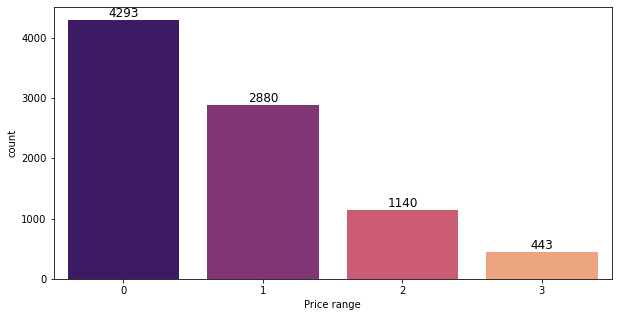

In [807]:
# Checking the count of feature 'Price range' 

plt.figure(figsize=(10,5))
ct = sns.countplot(y2,palette='magma')
for i in ct.containers:
    ct.bar_label(i,fontsize=12)

In [808]:
# Importing SMOTE from imblearn

from imblearn.over_sampling import SMOTE

In [809]:
# Applying SMOTE technique 

smt = SMOTE()

x3,y3 = smt.fit_resample(x2,y2)

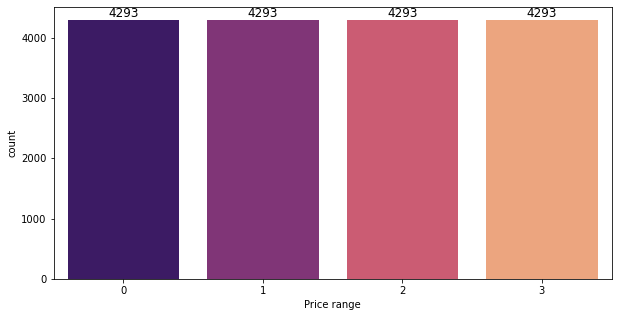

In [810]:
# Checking the count of feature 'Price range' after applying 'SMOTE'

plt.figure(figsize=(10,5))
ct = sns.countplot(y3,palette='magma')
for i in ct.containers:
    ct.bar_label(i,fontsize=12)

### Observations

Replaced the values in the target variable 'Price range' as follows

Price range 1 to 0

Price range 2 to 1

Price range 3 to 2

Price range 4 to 3

Target variable 'Price range' is imbalanced 

Applied SMOTE technique to balance the target variable and above countplot shows target variable is balanced with 
equal numbers

# Model Evaluation

In [811]:
# Checking the dimension of the data 

x3.shape

(17172, 14)

In [812]:
# Checking the dimension of the data 

y3.shape

(17172,)

In [813]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Finding Random State

In [814]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=.30,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x3_train,y3_train)
    predrf = rf.predict(x3_test)
    acc = accuracy_score(y3_test,predrf)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 98.50543478260869 on Random State 20


## Train and Test Split

In [815]:
# Training the Model with .30 as test size and random state at 20

x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=.30, random_state=20)

In [816]:
# Importing Required libraries

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## GaussianNB

In [817]:
GB = GaussianNB()
GB.fit(x3_train,y3_train)
print(GB.score(x3_train,y3_train))
GB_predict = GB.predict(x3_test)
cr1 = cross_val_score(GB,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,GB_predict)*100)
print('CV score of GaussianNB:',cr1.mean()*100)
print(confusion_matrix(y3_test,GB_predict))
print(classification_report(y3_test,GB_predict))

0.6470049916805325
Accuracy Score: 64.51863354037268
CV score of GaussianNB: 60.924801136676734
[[1227   33    7    9]
 [ 521  614   95   73]
 [  14  201  301  781]
 [   5    4   85 1182]]
              precision    recall  f1-score   support

           0       0.69      0.96      0.81      1276
           1       0.72      0.47      0.57      1303
           2       0.62      0.23      0.34      1297
           3       0.58      0.93      0.71      1276

    accuracy                           0.65      5152
   macro avg       0.65      0.65      0.61      5152
weighted avg       0.65      0.65      0.61      5152



## LogisticRegression

In [818]:
LR = LogisticRegression()
LR.fit(x3_train,y3_train)
print(LR.score(x3_train,y3_train))
LR_predict = LR.predict(x3_test)
cr2 = cross_val_score(LR,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,LR_predict)*100)
print('CV score of LogisticRegression:',cr2.mean()*100)
print(confusion_matrix(y3_test,LR_predict))
print(classification_report(y3_test,LR_predict))

0.5729617304492512
Accuracy Score: 58.50155279503105
CV score of LogisticRegression: 45.284880453110816
[[957 250  58  11]
 [204 761 269  69]
 [ 25 323 417 532]
 [ 22 107 268 879]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1276
           1       0.53      0.58      0.55      1303
           2       0.41      0.32      0.36      1297
           3       0.59      0.69      0.64      1276

    accuracy                           0.59      5152
   macro avg       0.58      0.59      0.58      5152
weighted avg       0.58      0.59      0.58      5152



## RandomForestClassifier

In [819]:
RFC = RandomForestClassifier()
RFC.fit(x3_train,y3_train)
print(RFC.score(x3_train,y3_train))
RFC_predict = RFC.predict(x3_test)
cr4 = cross_val_score(RFC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,RFC_predict)*100)
print('CV score of RandomForestClassifier:',cr4.mean()*100)
print(confusion_matrix(y3_test,RFC_predict))
print(classification_report(y3_test,RFC_predict))

1.0
Accuracy Score: 98.4472049689441
CV score of RandomForestClassifier: 93.43186170659192
[[1265   11    0    0]
 [   3 1278   22    0]
 [   0    6 1272   19]
 [   0    0   19 1257]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1276
           1       0.99      0.98      0.98      1303
           2       0.97      0.98      0.97      1297
           3       0.99      0.99      0.99      1276

    accuracy                           0.98      5152
   macro avg       0.98      0.98      0.98      5152
weighted avg       0.98      0.98      0.98      5152



## ExtraTreeClassifier

In [820]:
ET = ExtraTreeClassifier()
ET.fit(x3_train,y3_train)
print(ET.score(x3_train,y3_train))
ET_predict = ET.predict(x3_test)
cr5 = cross_val_score(ET,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,ET_predict)*100)
print('CV score of ExtraTreeClassifier:',cr5.mean()*100)
print(confusion_matrix(y3_test,ET_predict))
print(classification_report(y3_test,ET_predict))

1.0
Accuracy Score: 77.25155279503106
CV score of ExtraTreeClassifier: 77.522036251917
[[1016  235   17    8]
 [ 227  927  120   29]
 [  26  142  946  183]
 [   4   32  149 1091]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1276
           1       0.69      0.71      0.70      1303
           2       0.77      0.73      0.75      1297
           3       0.83      0.86      0.84      1276

    accuracy                           0.77      5152
   macro avg       0.77      0.77      0.77      5152
weighted avg       0.77      0.77      0.77      5152



## DecisionTreeClassifier

In [821]:
DTC = DecisionTreeClassifier()
DTC.fit(x3_train,y3_train)
print(DTC.score(x3_train,y3_train))
DTC_predict = DTC.predict(x3_test)
cr6 = cross_val_score(DTC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,DTC_predict)*100)
print('CV score of DecisionTreeClassifier:',cr6.mean()*100)
print(confusion_matrix(y3_test,DTC_predict))
print(classification_report(y3_test,DTC_predict))

1.0
Accuracy Score: 96.62267080745342
CV score of DecisionTreeClassifier: 92.73880765934287
[[1267    8    1    0]
 [   8 1267   26    2]
 [   0   22 1230   45]
 [   0    3   59 1214]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1276
           1       0.97      0.97      0.97      1303
           2       0.93      0.95      0.94      1297
           3       0.96      0.95      0.96      1276

    accuracy                           0.97      5152
   macro avg       0.97      0.97      0.97      5152
weighted avg       0.97      0.97      0.97      5152



## KNeighborsClassifier

In [822]:
KNC = KNeighborsClassifier()
KNC.fit(x3_train,y3_train)
print(KNC.score(x3_train,y3_train))
KNC_predict = KNC.predict(x3_test)
cr7 = cross_val_score(KNC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,KNC_predict)*100)
print('CV score of KNeighborsClassifier:',cr7.mean()*100)
print(confusion_matrix(y3_test,KNC_predict))
print(classification_report(y3_test,KNC_predict))

0.7863560732113145
Accuracy Score: 65.33385093167702
CV score of KNeighborsClassifier: 62.596445002835765
[[ 689  295  143  149]
 [ 304  711  169  119]
 [ 114  158  912  113]
 [  75   67   80 1054]]
              precision    recall  f1-score   support

           0       0.58      0.54      0.56      1276
           1       0.58      0.55      0.56      1303
           2       0.70      0.70      0.70      1297
           3       0.73      0.83      0.78      1276

    accuracy                           0.65      5152
   macro avg       0.65      0.65      0.65      5152
weighted avg       0.65      0.65      0.65      5152



## GradientBoostingClassifier

In [823]:
GBC = GradientBoostingClassifier()
GBC.fit(x3_train,y3_train)
print(GBC.score(x3_train,y3_train))
GBC_predict = GBC.predict(x3_test)
cr8 = cross_val_score(GBC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,GBC_predict)*100)
print('CV score of GradientBoostingClassifier:',cr8.mean()*100)
print(confusion_matrix(y3_test,GBC_predict))
print(classification_report(y3_test,GBC_predict))

0.9787021630615641
Accuracy Score: 97.03027950310559
CV score of GradientBoostingClassifier: 93.12300066379615
[[1273    1    2    0]
 [   8 1282   12    1]
 [   0   35 1218   44]
 [   0    0   50 1226]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1276
           1       0.97      0.98      0.98      1303
           2       0.95      0.94      0.94      1297
           3       0.96      0.96      0.96      1276

    accuracy                           0.97      5152
   macro avg       0.97      0.97      0.97      5152
weighted avg       0.97      0.97      0.97      5152



## AdaBoostClassifier

In [824]:
ABC = AdaBoostClassifier()
ABC.fit(x3_train,y3_train)
print(ABC.score(x3_train,y3_train))
ABC_predict = ABC.predict(x3_test)
cr9 = cross_val_score(ABC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,ABC_predict)*100)
print('CV score of AdaBoostClassifier:',cr9.mean()*100)
print(confusion_matrix(y3_test,ABC_predict))
print(classification_report(y3_test,ABC_predict))

0.7364392678868552
Accuracy Score: 74.78649068322981
CV score of AdaBoostClassifier: 72.97411195011102
[[1276    0    0    0]
 [  22 1221   36   24]
 [   0   73 1109  115]
 [   0    0 1029  247]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1276
           1       0.94      0.94      0.94      1303
           2       0.51      0.86      0.64      1297
           3       0.64      0.19      0.30      1276

    accuracy                           0.75      5152
   macro avg       0.77      0.75      0.72      5152
weighted avg       0.77      0.75      0.72      5152



## BaggingClassifier

In [825]:
BC = BaggingClassifier()
BC.fit(x3_train,y3_train)
print(BC.score(x3_train,y3_train))
BC_predict = BC.predict(x3_test)
cr10 = cross_val_score(BC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,BC_predict)*100)
print('CV score of BaggingClassifier:',cr10.mean()*100)
print(confusion_matrix(y3_test,BC_predict))
print(classification_report(y3_test,BC_predict))

0.998252911813644
Accuracy Score: 98.17546583850931
CV score of BaggingClassifier: 93.14065611544459
[[1272    4    0    0]
 [   5 1283   13    2]
 [   1   15 1255   26]
 [   0    0   28 1248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       0.99      0.98      0.99      1303
           2       0.97      0.97      0.97      1297
           3       0.98      0.98      0.98      1276

    accuracy                           0.98      5152
   macro avg       0.98      0.98      0.98      5152
weighted avg       0.98      0.98      0.98      5152



## AUC_ROC_CURVE - Area under the Curve Receiver Operating Characteristic

In [826]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

GaussianNB() 0.9117398162963687
LogisticRegression() 0.8206383219390232
RandomForestClassifier() 0.9996397961208064
ExtraTreeClassifier() 0.8486774250052008
DecisionTreeClassifier() 0.9775118576200464
KNeighborsClassifier() 0.8582004216779288
GradientBoostingClassifier() 0.9983467761276419
AdaBoostClassifier() 0.8649722213111993
BaggingClassifier() 0.9989092507282846


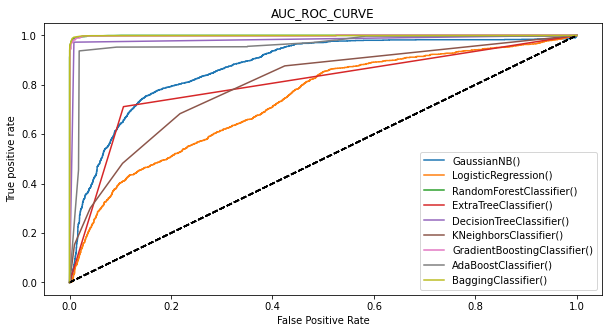

In [827]:
model = [GB,LR,RFC,ET,DTC,KNC,GBC,ABC,BC]
auc=[]


plt.figure(figsize=(10,5))
for i in model:
    y_pred_prob = i.predict_proba(x3_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y3_test,y_pred_prob,pos_label=True)
    plt.plot(fpr,tpr,label=i )
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive rate')
    plt.title('AUC_ROC_CURVE')
    plt.legend()


    auc_score = roc_auc_score(y3_test,i.predict_proba(x3_test),multi_class= 'ovo')
    auc.append(auc_score)
    print(i,auc_score)
plt.show()

### Observations

Based on Model evaluation and AUC_ROC_score RandomForestClassifier and Bagging classifer are performing very well

Proceeding both the model for Hyper Parameter Tuning

## Hyper Parameter Tuning

### Hyper Parameter Tuning - RandomForestClassifier

In [828]:
grid_params={'n_estimators':[50,100,150,200],'criterion':['gini','entropy','log_loss'],
            'max_depth':[5,10,20,50],'min_samples_split':[2,4,5],'max_features':['sqrt','log2']}
             
        
gs = GridSearchCV(RandomForestClassifier(),param_grid=grid_params)

g_res = gs.fit(x3_train,y3_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [50, 100, 150, 200]})
Best Score 0.9765391014975041
Best Params {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


In [829]:
# Applying parameters for RandomForestClassifier

Final_Model1 = RandomForestClassifier(criterion ='gini',max_depth = 20,max_features ='sqrt',
                                      min_samples_split=2, n_estimators=100)
                                       
Final_Model1.fit(x3_train,y3_train)
pred1 = Final_Model1.predict(x3_test)
print(Final_Model1.score(x3_train,y3_train))
cr_v1= cross_val_score(Final_Model1,x3,y3,cv=5)

print('Accuracy_score',accuracy_score(y3_test,pred1)*100)
print('CV score of RandomForestClassifier:',cr_v1.mean()*100)
print(confusion_matrix(y3_test,pred1))
print(classification_report(y3_test,pred1))

1.0
Accuracy_score 98.4472049689441
CV score of RandomForestClassifier: 93.43767734081399
[[1258   18    0    0]
 [   2 1278   22    1]
 [   0    8 1272   17]
 [   0    0   12 1264]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1276
           1       0.98      0.98      0.98      1303
           2       0.97      0.98      0.98      1297
           3       0.99      0.99      0.99      1276

    accuracy                           0.98      5152
   macro avg       0.98      0.98      0.98      5152
weighted avg       0.98      0.98      0.98      5152



### Hyper Parameter Tuning - BaggingClassifier

In [830]:
grid_params={'n_estimators':[50,100,150,200],
             'max_samples':[0.5, 0.7, 0.9],'max_features':[0.5, 0.7, 0.9,1.0,],'bootstrap':[bool,False]}
             
        
gs = GridSearchCV(BaggingClassifier(),param_grid=grid_params)

g_res = gs.fit(x3_train,y3_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'bootstrap': [<class 'bool'>, False],
                         'max_features': [0.5, 0.7, 0.9, 1.0],
                         'max_samples': [0.5, 0.7, 0.9],
                         'n_estimators': [50, 100, 150, 200]})
Best Score 0.9806156405990016
Best Params {'bootstrap': False, 'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 150}


In [832]:
# Applying parameters for BaggingClassifier

Final_Model2 = BaggingClassifier(bootstrap =False,max_features = 0.7,max_samples =0.9,n_estimators=150)
                                      
                                       
Final_Model2.fit(x3_train,y3_train)
pred2 = Final_Model2.predict(x3_test)
print(Final_Model2.score(x3_train,y3_train))
cr_v2= cross_val_score(Final_Model2,x3,y3,cv=5)

print('Accuracy_score',accuracy_score(y3_test,pred2)*100)
print('CV score of BaggingClassifier:',cr_v2.mean()*100)
print(confusion_matrix(y3_test,pred2))
print(classification_report(y3_test,pred2))

1.0
Accuracy_score 98.99068322981367
CV score of BaggingClassifier: 94.04911582861344
[[1268    8    0    0]
 [   0 1289   14    0]
 [   0    5 1279   13]
 [   0    0   12 1264]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1276
           1       0.99      0.99      0.99      1303
           2       0.98      0.99      0.98      1297
           3       0.99      0.99      0.99      1276

    accuracy                           0.99      5152
   macro avg       0.99      0.99      0.99      5152
weighted avg       0.99      0.99      0.99      5152



## AUC_ROC_Curve for Final Model

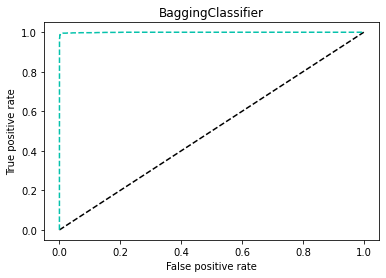

0.9996576772319816

In [833]:
# Checking roc_auc_score for RandomForestClassifier - Final Model

y_pred_prob_ = Final_Model2.predict_proba(x3_test)[:,1]
fpr,tpr,thresholds = roc_curve(y3_test,y_pred_prob_,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='BaggingClassifier',linestyle='--',color='#06c2ac')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('BaggingClassifier')
plt.show()

auc_score = roc_auc_score(y3_test,Final_Model2.predict_proba(x3_test),multi_class ='ovo')
auc_score

## Saving the Final Model

In [834]:
# Saving the model using .pkl

import joblib

joblib.dump(Final_Model2,"Zomato_Restaurant_Class.pkl")

['Zomato_Restaurant_Class.pkl']

## Predicting the Model

In [835]:
# Loading the saved model

Model2=joblib.load("Zomato_Restaurant_Class.pkl")

#Prediction
prediction2 = Model2.predict(x3_test)
prediction2

array([1, 2, 2, ..., 0, 3, 2], dtype=int64)

In [836]:
pd.set_option('display.max_rows',None)
pd.DataFrame([Model2.predict(x3_test)[:],y3_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0             1         1
1             2         2
2             2         2
3             2         2
4             3         3
5             0         0
6             0         0
7             0         0
8             1         1
9             1         1
10            3         3
11            2         2
12            1         1
13            3         3
14            3         3
15            2         2
16            2         2
17            0         0
18            0         0
19            1         1
20            1         1
21            1         1
22            1         1
23            1         1
24            2         2
25            2         2
26            2         2
27            3         3
28            0         0
29            3         3
30            3         3
31            2         2
32            1         1
33            2         2
34            3         3
35            0         0
36            3         3
37            1         1
38            3         3
39            1         1
40            3         3
41            0         0
42            2         2
43            2         2
44            3         3
45            0         0
46            1         1
47            0         0
48            0         0
49            2         2
50            3         3
51            3         3
52            0         0
53            0         0
54            0         0
55            1         1
56            0         0
57            1         1
58            3         3
59            2         2
60            2         2
61            3         3
62            2         2
63            1         1
64            2         2
65            3         3
66            2         2
67            3         3
68            1         1
69            3         3
70            0         0
71            3         3
72            1         1
73            3         3
74            1         1
75            2         2
76            2         2
77            2         2
78            2         2
79            0         0
80            0         0
81            3         3
82            3         3
83            3         3
84            1         1
85            2         2
86            2         2
87            3         3
88            0         0
89            3         3
90            2         2
91            2         2
92            0         0
93            2         2
94            1         1
95            1         1
96            3         3
97            2         2
98            2         2
99            3         3
100           1         1
101           0         0
102           0         0
103           3         3
104           0         0
105           3         3
106           3         3
107           1         1
108           3         3
109           0         0
110           3         3
111           1         1
112           0         0
113           2         2
114           2         2
115           1         1
116           2         2
117           2         2
118           1         1
119           3         3
120           3         3
121           0         0
122           1         1
123           3         3
124           0         0
125           2         2
126           0         0
127           1         1
128           0         0
129           0         0
130           0         0
131           2         2
132           1         1
133           1         1
134           2         2
135           2         2
136           2         2
137           1         1
138           3         3
139           3         3
140           3         3
141           2         2
142           2         2
143           1         1
144           0         0
145           3         3
146           3         3
147           0         0
148           1         2
149           3         3
150           0         0
151           3         3
152           2         2
15

# Conclusion for Classification model

# Final Conclusion

## Summary for Data Analysis

Imported required libraries and dataset, merged both the files Zomato and Country Code

Dataset contains 9551 rows and 22 columns

Maximum restaurants are documented from India, which is almost 94% of the data are restaurants from India 

'Average cost for two' count is maximum in 500, 300 and 400, currency differs in each country based on their value

Based on the feature 'Has Table booking', almost 88% of restaurants dont have the option of booking table 

For the feature 'Has Online delivery', almost 75% of restaurants dont have the option of Online delivery 

For the feature rating text, most of the restaurants which is 3737 have been rated as Average and
2148 restaurants are not rated 

Restaurants which have the option of booking table and Online delivery got good aggregated rating compared with 
restaurants which as no option 

Country with highest aggregated rating is Phillipines with 4.4, Turkey with 4.3, Indonesia, New Zealand, UAE and 
South Africa with 4.2

Country with the lowest rating is India, this may be due to large number of customer's who have not given the rating

City with highest Aggregate ratings are Inner City 4.9, Quezon City 4.8, Beechworth 4.6, London, Lincoln and 
Secunderabad with 4.5

City with lowest Aggregate ratings are Faridabad 1.8 and Noida 2.0

Below Price Range shows an average cost for two in India, as the majority of the data are from the restaurants in India

Price Range 1 - 204.16

Price Range 2 - 631.66

Price Range 3 - 1343.52

Price Range 4 - 2110

Data  may vary if we have the complete data with customer's voting

In India Panchkula got the highest Average cost with 2000, followed by Hyderabad 1361 and Pune with 1337

City with lowest average cost is Faridabad with 447 and Amritsar with 480

Suggestion in this dataset, instead of having details of global restaurants, it could be better to keep the data country wise
which will help in analysing even better and build predictable model based on the country and region 

## Summary for Model Evaluation

9 Null values are present in the feature Cuisines which is small, hence dropped them from the dataset

Dropped the features 'Restaurant ID','Locality','Switch to order menu','Rating color','Address','Country Code' from the dataset for below reasons

Restaurant ID – Unique ID which represents the restaurant, it will not be much relevant for Model prediction

Locality – Almost same with the feature Locality Verbose, hence dropped the column

Switch to order menu – Contains only one unique value ‘ No’, it will not be much relevant for model prediction

Rating color – Already we have a column name Rating Text based on which the rating color was assigned, its better 
to drop as it is not much relevant

Address – We do have City, locality Verbose, Restaurant name with latitude and longitude information, hence address
will not be much relevant for Model prediction

Country Code – Dropped the column as it is the code assigned to Country and we do have Country name, moreover
Country code skewness reduced to NaN after applying transformation method and it is affecting in removing outliers
as well, hence dropped the column before getting into feature Engineering

After applying Zscore method, data loss is 8.23% which is in acceptable range 

Skewness was high in features 'Longitude','Price range','Aggregate rating','Votes','Latitude'

Applied PowerTransformer(method='yeo-johnson') to the above feature and skewness reduced reasonably well
Further applying transformation method sqrt, cbrt, log to the feature 'Longitude' and 'Aggregate rating' is 
reducing the value to NaN

For 'Average Cost for two' as it is the target variable, tried not to apply transformation methods but the performance
of the Model is very poor, hence applied 'sqrt' to reduce skewness and performance improved

Kept the threshold to +/- 0.9 to numerical features, except for target variable

Dropped the feature 'Is delivering now' as the skewness is high, even though it is an encoded feature performance 
of the model had no changes in dropping the column

VIF is high in the features 'Price range','Aggregate rating','Votes','Longitude','Latitude
Applied Standard Scaler method to standardize the feature and Dropped the feature Currency to reduce VIF across 
all the features

Before dropping the features tried PCA method but there was no much improvement, hence dropped those features and
performance of the Model improved

Based on Model evaluation and Hyper Parameter Tuning Gradient ExtraTreesRegressor and Bagging Classifier performed well

Concluding ExtraTreesRegressor as the best fit model for Regression based on r2_score 90% vs CV_Score 79% with 
MSE: 8.637282163607589, MAE: 2.1749942693473456 and RMSE: 2.9389253416185293

Concluding Bagging Classifier as the best fit model for Classification based on 
Accuracy_score 99% vs CV_Score 94% vs AUC_ROC_Score 99% and below classification report which is better than other Model.

                 precision    recall  f1-score   support

              0       1.00      0.99      1.00      1276
              1       0.99      0.99      0.99      1303
              2       0.98      0.99      0.98      1297
            3       0.99      0.99      0.99      1276

        accuracy                           0.99      5152
    
       macroavg       0.99      0.99      0.99      5152
    
    weighted avg       0.99      0.99      0.99      5152

Finally, when we compare Predicted Vs Original we can observe ExtraTreesRegressorr and Bagging Classifier
are performing well with Zomato Restaurant Dataset and prediction is same with original

We can use the above model for production in prediciting Average cost and Price Range

Thank you for Providing the opportunity to work on the Zomato Restaurant Dataset
